# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sys
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# After the dataset is scraped, it is time to visualize the data, check for null values,
# remove outliers (if any), select features, hyperparameter search, and finally train and test
# the model. The ultimate goal is to predict the result of football matches in English
# Premier League.

# Get Data

In [3]:
shooting = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/shooting.csv')
passing = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/passing.csv')
passing_types = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/passing_types.csv')
goal_shot_create = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/goal_shot_create.csv')
goalkeeping = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/goalkeeping.csv')
possession = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/possession.csv')
defense = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/defense.csv')
miscellaneous = pd.read_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/miscellaneous.csv')

# EDA

In [4]:
print("shooting shape: ", shooting.shape)
print("passing shape: ", passing.shape)
print("passing_types shape: ", passing_types.shape)
print("goal_shot_create shape: ", goal_shot_create.shape)
print("goalkeeping shape: ", goalkeeping.shape)
print("possession shape: ", possession.shape)
print("defense shape: ", defense.shape)
print("miscellaneous shape: ", miscellaneous.shape)

shooting shape:  (3292, 28)
passing shape:  (3292, 33)
passing_types shape:  (3292, 36)
goal_shot_create shape:  (3292, 36)
goalkeeping shape:  (3292, 30)
possession shape:  (3292, 34)
defense shape:  (3292, 36)
miscellaneous shape:  (3292, 36)


In [5]:
shooting.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,2022,Arsenal


In [6]:
passing.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,cmp,att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0,2022,Arsenal


In [7]:
possession.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,touches,def pen,def 3rd,mid 3rd,att 3rd,att pen,succ,att,mis,dis,rec,prog,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0,2022,Arsenal


In [8]:
goalkeeping.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,saves,cs,pksv,att,launch%,avglen,stp,#opa,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0,2022,Arsenal


In [9]:
passing_types.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,live,dead,fk,tb,sw,crs,ti,ck,in,out,str,cmp,off,blocks,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,378.0,2.0,6.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,407.0,2.0,10.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,534.0,3.0,9.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,534.0,1.0,13.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,452.0,1.0,7.0,2022,Arsenal


In [10]:
goal_shot_create.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sca,passlive,passdead,drib,sh,fld,def,gca,passlive.1,passdead.1,drib.1,sh.1,fld.1,def.1,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2022,Arsenal


In [11]:
defense.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,tkl,tklw,def 3rd,mid 3rd,att 3rd,tkl.1,att,past,blocks,sh,int,tkl+int,clr,err,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0,2022,Arsenal


In [12]:
miscellaneous.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,crdy,crdr,2crdy,fls,fld,off,crs,int,pkwon,pkcon,og,recov,won,lost,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,2.0,0.0,0.0,11.0,16.0,2.0,11.0,9.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,1.0,0.0,0.0,15.0,9.0,2.0,17.0,8.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,1.0,0.0,0.0,10.0,12.0,3.0,16.0,10.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,2.0,0.0,0.0,6.0,12.0,1.0,19.0,7.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,2.0,0.0,0.0,10.0,14.0,1.0,20.0,8.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [13]:
shooting = shooting.drop(['Unnamed: 0','season','team'], axis=1)

In [14]:
shooting.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0


In [15]:
passing = passing.iloc[:, 20:31]

In [16]:
passing.head()

,cmp,att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa
0,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0
1,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0
2,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0
3,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0
4,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0


In [17]:
possession = possession.iloc[:, 20:32]
possession.head()

,touches,def pen,def 3rd,mid 3rd,att 3rd,att pen,succ,att,mis,dis,rec,prog
0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0
1,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0
2,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0
3,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0
4,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0


In [18]:
goalkeeping = goalkeeping.iloc[:, 20:28]
goalkeeping.head()

,saves,cs,pksv,att,launch%,avglen,stp,#opa
0,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0
1,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0
2,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0
3,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0
4,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0


In [19]:
passing_types = passing_types.iloc[:, 20:34]
passing_types.head()

,live,dead,fk,tb,sw,crs,ti,ck,in,out,str,cmp,off,blocks
0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,378.0,2.0,6.0
1,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,407.0,2.0,10.0
2,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,534.0,3.0,9.0
3,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,534.0,1.0,13.0
4,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,452.0,1.0,7.0


In [20]:
goal_shot_create = goal_shot_create.iloc[:, 20:34]
goal_shot_create.head()

,sca,passlive,passdead,drib,sh,fld,def,gca,passlive.1,passdead.1,drib.1,sh.1,fld.1,def.1
0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
1,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0
2,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0
3,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0
4,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [21]:
defense = defense.iloc[:, 20:34]
defense.head()

,tkl,tklw,def 3rd,mid 3rd,att 3rd,tkl.1,att,past,blocks,sh,int,tkl+int,clr,err
0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0
1,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0
2,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0
3,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0
4,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0


In [22]:
miscellaneous = miscellaneous.iloc[:, 20:36]
miscellaneous.head()

,crdy,crdr,2crdy,fls,fld,off,crs,int,pkwon,pkcon,og,recov,won,lost,season,team
0,2.0,0.0,0.0,11.0,16.0,2.0,11.0,9.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,1.0,0.0,0.0,15.0,9.0,2.0,17.0,8.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,1.0,0.0,0.0,10.0,12.0,3.0,16.0,10.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2.0,0.0,0.0,6.0,12.0,1.0,19.0,7.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2.0,0.0,0.0,10.0,14.0,1.0,20.0,8.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [23]:
print("shooting shape: ", shooting.shape)
print("passing shape: ", passing.shape)
print("passing_types shape: ", passing_types.shape)
print("goal_shot_create shape: ", goal_shot_create.shape)
print("goalkeeping shape: ", goalkeeping.shape)
print("possession shape: ", possession.shape)
print("defense shape: ", defense.shape)
print("miscellaneous shape: ", miscellaneous.shape)

shooting shape:  (3292, 25)
passing shape:  (3292, 11)
passing_types shape:  (3292, 14)
goal_shot_create shape:  (3292, 14)
goalkeeping shape:  (3292, 8)
possession shape:  (3292, 12)
defense shape:  (3292, 14)
miscellaneous shape:  (3292, 16)


In [24]:
shooting.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt'],
      dtype='object')

In [25]:
shooting = shooting.rename(columns={'fk':'sh_fk','pk':'sh_pk'})
shooting.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,sh_fk,sh_pk,pkatt
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0


In [26]:
passing = passing.rename(columns={'att':'pass_att'})
passing.head()

,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa
0,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0
1,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0
2,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0
3,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0
4,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0


In [27]:
possession.columns

Index(['touches', 'def pen', 'def 3rd', 'mid 3rd', 'att 3rd', 'att pen',
       'succ', 'att', 'mis', 'dis', 'rec', 'prog'],
      dtype='object')

In [28]:
possession = possession.rename(columns={'def pen':'p_def_pen','def 3rd':'p_def_3rd', 'mid 3rd':'p_mid_3rd', 
                                        'att 3rd':'p_att_3rd', 'att pen':'p_att_pen','succ':'drib_succ','prog':'prog_pass_rec'}) 
possession.head()

,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec
0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0
1,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0
2,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0
3,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0
4,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0


In [29]:
goalkeeping.columns

Index(['saves', 'cs', 'pksv', 'att', 'launch%', 'avglen', 'stp', '#opa'], dtype='object')

In [30]:
goalkeeping = goalkeeping.rename(columns={'att':'gk_att'}) 
goalkeeping.head()

,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa
0,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0
1,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0
2,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0
3,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0
4,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0


In [31]:
passing_types.columns

Index(['live', 'dead', 'fk', 'tb', 'sw', 'crs', 'ti', 'ck', 'in', 'out', 'str',
       'cmp', 'off', 'blocks'],
      dtype='object')

In [32]:
passing_types = passing_types.rename(columns={'fk':'pt_fk','blocks':'p_blocks'}) 
passing_types.head()

,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,cmp,off,p_blocks
0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,378.0,2.0,6.0
1,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,407.0,2.0,10.0
2,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,534.0,3.0,9.0
3,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,534.0,1.0,13.0
4,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,452.0,1.0,7.0


In [33]:
goal_shot_create.columns

Index(['sca', 'passlive', 'passdead', 'drib', 'sh', 'fld', 'def', 'gca',
       'passlive.1', 'passdead.1', 'drib.1', 'sh.1', 'fld.1', 'def.1'],
      dtype='object')

In [34]:
goal_shot_create = goal_shot_create.rename(columns={'sca':'s_sca','passlive':'s_passlive', 'passdead':'s_passdead', 
                                        'drib':'s_drib', 'sh':'s_sh','fld':'s_fld','def':'s_def',
                                                   'passlive.1':'g_passlive', 'passdead.1':'g_passdead', 'drib.1':'g_drib', 
                                                    'sh.1':'g_sh', 'fld.1':'g_fld', 'def.1':'g_def'}) 
goal_shot_create.head()

,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def
0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
1,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0
2,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0
3,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0
4,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [35]:
defense.columns

Index(['tkl', 'tklw', 'def 3rd', 'mid 3rd', 'att 3rd', 'tkl.1', 'att', 'past',
       'blocks', 'sh', 'int', 'tkl+int', 'clr', 'err'],
      dtype='object')

In [36]:
defense = defense.rename(columns={'tkl':'t_tkl','tklw':'t_tklw', 'def 3rd':'t_def_3rd', 
                                        'mid 3rd':'t_mid_3rd', 'att 3rd':'t_att_3rd','tkl.1':'d_tkl','att':'d_att',
                                                   'blocks':'d_blocks', 'sh':'sh_b'}) 
defense.head()

,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err
0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0
1,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0
2,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0
3,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0
4,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0


In [37]:
miscellaneous.columns

Index(['crdy', 'crdr', '2crdy', 'fls', 'fld', 'off', 'crs', 'int', 'pkwon',
       'pkcon', 'og', 'recov', 'won', 'lost', 'season', 'team'],
      dtype='object')

In [38]:
miscellaneous = miscellaneous.rename(columns={'won':'a_won','lost':'a_lost'}) 
miscellaneous.head()

,crdy,crdr,2crdy,fls,fld,off,crs,int,pkwon,pkcon,og,recov,a_won,a_lost,season,team
0,2.0,0.0,0.0,11.0,16.0,2.0,11.0,9.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,1.0,0.0,0.0,15.0,9.0,2.0,17.0,8.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,1.0,0.0,0.0,10.0,12.0,3.0,16.0,10.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2.0,0.0,0.0,6.0,12.0,1.0,19.0,7.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2.0,0.0,0.0,10.0,14.0,1.0,20.0,8.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [39]:
passing_types = passing_types.drop(['cmp'],axis=1)

In [40]:
miscellaneous = miscellaneous.drop(['off','crs','int'],axis=1)

In [41]:
# concatenate different datasets with initially selected columns
data = pd.concat([shooting, passing, passing_types, goal_shot_create, goalkeeping, possession, defense, miscellaneous], axis=1)


In [42]:
data.to_csv('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/csv_main/main_data.csv')

# Data is ready

In [43]:
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,2.0,6.0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0,2.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,2.0,10.0,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0,1.0,0.0,0.0,15.0,9.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,3.0,9.0,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0,1.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,1.0,13.0,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0,2.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,1.0,7.0,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0,2.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [44]:
data.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,season,team
3287,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,0.8,2.5,31.0,58308.0,Christopher Schindler,5-4-1,Lee Mason,Match Report,NaN,7.0,1.0,18.9,1.0,0.0,0.0,244.0,344.0,4111.0,1648.0,0.0,0.7,0.6,5.0,15.0,7.0,1.0,298.0,46.0,10.0,2.0,2.0,17.0,21.0,2.0,1.0,1.0,0.0,0.0,13.0,13.0,7.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,82.6,50.2,2.0,0.0,434.0,53.0,143.0,211.0,87.0,15.0,11.0,18.0,11.0,9.0,237.0,14.0,13.0,8.0,4.0,7.0,2.0,5.0,19.0,14.0,20.0,9.0,16.0,29,15.0,0.0,2.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,45.0,13.0,20.0,2018,Huddersfield Town
3288,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,1.0,0.9,46.0,23957.0,Christopher Schindler,4-4-1-1,Roger East,Match Report,NaN,13.0,3.0,18.1,1.0,0.0,0.0,331.0,418.0,5551.0,2215.0,1.0,0.8,0.4,8.0,28.0,5.0,2.0,376.0,41.0,10.0,0.0,3.0,14.0,21.0,2.0,1.0,1.0,0.0,1.0,9.0,22.0,14.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,36.8,36.3,2.0,3.0,524.0,49.0,142.0,264.0,124.0,12.0,7.0,12.0,9.0,11.0,322.0,25.0,15.0,8.0,8.0,6.0,1.0,4.0,9.0,5.0,14.0,1.0,12.0,27,17.0,1.0,2.0,0.0,0.0,15.0,9.0,0.0,0.0,0.0,52.0,12.0,10.0,2018,Huddersfield Town
3289,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,0.2,3.1,31.0,53249.0,Christopher Schindler,4-1-4-1,Kevin Friend,Match Report,NaN,5.0,1.0,21.6,0.0,0.0,0.0,230.0,341.0,3854.0,1863.0,0.0,0.2,0.1,4.0,13.0,3.0,0.0,284.0,53.0,7.0,1.0,1.0,8.0,22.0,4.0,3.0,1.0,0.0,4.0,10.0,9.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,25.0,70.6,49.0,1.0,0.0,451.0,55.0,167.0,198.0,90.0,10.0,4.0,12.0,14.0,11.0,225.0,7.0,23.0,15.0,9.0,14.0,0.0,9.0,20.0,11.0,10.0,2.0,12.0,35,21.0,1.0,0.0,0.0,0.0,14.0,5.0,0.0,0.0,0.0,42.0,9.0,11.0,2018,Huddersfield Town
3290,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,1.0,1.8,36.0,24263.0,Christopher Schindler,4-3-3,Lee Mason,Match Report,NaN,7.0,3.0,19.0,1.0,0.0,0.0,257.0,373.0,4249.0,2102.0,1.0,1.0,0.3,6.0,20.0,6.0,0.0,318.0,53.0,11.0,0.0,2.0,9.0,25.0,3.0,2.0,0.0,0.0,2.0,9.0,10.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,29.0,62.1,44.0,1.0,1.0,471.0,68.0,172.0,191.0,115.0,13.0,5.0,14.0,14.0,6.0,254.0,15.0,18.0,9.0,9.0,7.0,2.0,2.0,12.0,10.0,19.0,6.0,9.0,27,19.0,2.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,45.0,12.0,12.0,2018,Huddersfield Town
3291,2019-05-12,15:00,Premier League,Matchweek 38,Sun,Away,D,1.0,1.0,Southampton,0.7,0.6,47.0,30367.0,Christopher Schindler,4-3-3,Lee Probert,Match Report,NaN,10.0,3.0,22.2,0.0,0.0,0.0,285.0,437.0,4611.0,1770.0,0.0,0.3,0.2,6.0,19.0,3.0,1.0,382.0,53.0,9.0,0.0,2.0,14.0,33.0,3.0,2.0,1.0,0.0,2.0,14.0,14.0,8.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,29.0,74.2,48.3,1.0,1.0,545.0,64.0,209.0,225.0,115.0,7.0,5.0,7.0,13.0,10.0,281.0,16.0,27.0,13.0,10.0,13.0,4.0,10.0,23.0,13.0,12.0,4.0,10.0,37,27.0,0.0,1.0,0.0,0.0,6.0,8.0,0.0,0.0,0.0,54.0,24.0,40.0,2018,Huddersfield Town


In [45]:
data.shape

(3292, 110)

In [46]:
# Lower case with underscores
cols = []
for column in data.columns:
    cols.append(column.lower().replace(' ','_'))
cols
data.columns = cols

data.head(5)

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match_report,notes,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,2.0,6.0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0,2.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,2.0,10.0,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0,1.0,0.0,0.0,15.0,9.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,3.0,9.0,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0,1.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,1.0,13.0,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0,2.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,1.0,7.0,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0,2.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [47]:
data.isna().sum()

date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance        881
captain             0
formation           0
referee             0
match_report        0
notes            3292
sh                  0
sot                 0
dist                2
sh_fk               0
sh_pk               0
pkatt               0
cmp                 0
pass_att            0
totdist             0
prgdist             0
ast                 0
xag                 0
xa                  0
kp                  0
1/3                 0
ppa                 0
crspa               0
live                0
dead                0
pt_fk               0
tb                  0
sw                  0
crs                 0
ti                  0
ck                  0
in                  0
out       

In [48]:
# check for null values
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index() # fraction of null values
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,date,0.000000
1,time,0.000000
2,comp,0.000000
3,round,0.000000
4,day,0.000000
5,venue,0.000000
6,result,0.000000
7,gf,0.000000
8,ga,0.000000
9,opponent,0.000000


In [49]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

13    attendance
18         notes
Name: column_name, dtype: object

In [50]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['attendance', 'notes']


In [51]:
len(drop_columns_list)

2

In [52]:
data = data.drop(columns=drop_columns_list)
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,match_report,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,10.0,2.0,14.6,1.0,0.0,0.0,378.0,469.0,6643.0,2559.0,1.0,0.6,0.8,7.0,34.0,10.0,0.0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,2.0,6.0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,15.0,46.7,36.5,2.0,1.0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0,2.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,19.0,7.0,13.0,0.0,0.0,0.0,407.0,499.0,6642.0,2321.0,3.0,1.5,1.0,14.0,29.0,7.0,2.0,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,2.0,10.0,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,43.5,37.3,0.0,1.0,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0,1.0,0.0,0.0,15.0,9.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,14.0,6.0,14.8,0.0,0.0,0.0,534.0,614.0,8331.0,2663.0,2.0,0.8,0.6,9.0,24.0,6.0,2.0,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,3.0,9.0,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,39.1,33.6,0.0,0.0,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0,1.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,22.0,8.0,15.5,1.0,0.0,0.0,534.0,637.0,9990.0,3197.0,2.0,2.1,1.3,16.0,42.0,17.0,3.0,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,1.0,13.0,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,31.8,30.8,2.0,0.0,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0,2.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,22.0,8.0,16.3,1.0,0.0,0.0,452.0,549.0,8154.0,3066.0,1.0,1.8,1.5,15.0,40.0,16.0,0.0,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,1.0,7.0,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,13.0,40.9,37.6,0.0,0.0,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0,2.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [53]:
data['dist'].value_counts(dropna=False)

17.9    54
18.0    53
16.8    51
18.3    50
19.0    49
17.0    49
18.6    48
18.1    48
17.2    47
17.8    47
17.5    46
16.9    46
17.3    46
16.4    46
19.7    45
19.4    45
18.9    45
18.2    45
18.5    45
17.1    45
16.7    44
15.7    44
17.7    44
19.1    43
16.2    43
16.3    43
16.0    43
15.9    42
18.4    42
16.6    42
18.8    42
16.5    41
15.4    40
15.6    40
16.1    39
17.6    39
17.4    39
19.2    37
18.7    37
15.8    37
15.1    36
15.5    36
15.3    36
19.8    34
15.0    34
19.3    32
14.9    32
19.6    30
15.2    30
19.5    29
14.7    28
13.9    28
14.6    28
20.0    28
19.9    27
14.8    27
14.2    27
20.1    26
20.4    26
20.3    26
13.6    26
20.7    25
14.5    25
20.8    25
13.8    25
14.4    24
20.5    24
21.1    22
21.2    20
14.1    20
21.4    20
20.2    19
12.7    18
21.5    18
20.9    17
21.7    17
13.4    16
21.0    16
21.3    16
13.3    15
12.8    15
20.6    14
22.6    14
14.3    14
21.9    14
14.0    13
13.2    13
13.1    13
22.2    12
22.5    12
22.3    12

In [54]:
data['dist'] = data['dist'].fillna(np.mean(data['dist']))

In [55]:
data.isna().sum().sum()

0

In [56]:
data.dtypes

date              object
time              object
comp              object
round             object
day               object
venue             object
result            object
gf               float64
ga               float64
opponent          object
xg               float64
xga              float64
poss             float64
captain           object
formation         object
referee           object
match_report      object
sh               float64
sot              float64
dist             float64
sh_fk            float64
sh_pk            float64
pkatt            float64
cmp              float64
pass_att         float64
totdist          float64
prgdist          float64
ast              float64
xag              float64
xa               float64
kp               float64
1/3              float64
ppa              float64
crspa            float64
live             float64
dead             float64
pt_fk            float64
tb               float64
sw               float64
crs              float64


In [57]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [58]:
data['season'] = data['season'].astype(str)

In [59]:
data.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                      float64
ga                      float64
opponent                 object
xg                      float64
xga                     float64
poss                    float64
captain                  object
formation                object
referee                  object
match_report             object
sh                      float64
sot                     float64
dist                    float64
sh_fk                   float64
sh_pk                   float64
pkatt                   float64
cmp                     float64
pass_att                float64
totdist                 float64
prgdist                 float64
ast                     float64
xag                     float64
xa                      float64
kp                      float64
1/3     

In [60]:
# convert yard to meter
def yard(data): # 0.9144 yard = 1 meter
    data['dist'] = data['dist'].apply(lambda x: x*0.9144)
    data['avglen'] = data['avglen'].apply(lambda x: x*0.9144)
    data['totdist'] = data['totdist'].apply(lambda x: x*0.9144)
    data['prgdist'] = data['prgdist'].apply(lambda x: x*0.9144)
    
    return data

In [61]:
data=yard(data)

In [62]:
data.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,match_report,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,10.0,2.0,13.35024,1.0,0.0,0.0,378.0,469.0,6074.3592,2339.9496,1.0,0.6,0.8,7.0,34.0,10.0,0.0,429.0,38.0,16.0,0.0,4.0,11.0,14.0,5.0,5.0,0.0,0.0,2.0,6.0,19.0,11.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,15.0,46.7,33.37560,2.0,1.0,598.0,78.0,220.0,251.0,135.0,29.0,13.0,17.0,19.0,15.0,376.0,31.0,29.0,16.0,17.0,10.0,2.0,13.0,29.0,16.0,17.0,6.0,9.0,38,24.0,0.0,2.0,0.0,0.0,11.0,16.0,0.0,0.0,0.0,55.0,14.0,10.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,19.0,7.0,11.88720,0.0,0.0,0.0,407.0,499.0,6073.4448,2122.3224,3.0,1.5,1.0,14.0,29.0,7.0,2.0,458.0,39.0,12.0,2.0,2.0,17.0,15.0,6.0,5.0,0.0,0.0,2.0,10.0,33.0,23.0,4.0,1.0,3.0,2.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,43.5,34.10712,0.0,1.0,585.0,32.0,137.0,229.0,221.0,34.0,11.0,17.0,12.0,7.0,403.0,22.0,8.0,6.0,5.0,1.0,2.0,5.0,8.0,3.0,9.0,1.0,8.0,16,12.0,0.0,1.0,0.0,0.0,15.0,9.0,0.0,0.0,1.0,50.0,19.0,14.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,14.0,6.0,13.53312,0.0,0.0,0.0,534.0,614.0,7617.8664,2435.0472,2.0,0.8,0.6,9.0,24.0,6.0,2.0,576.0,35.0,13.0,0.0,2.0,16.0,13.0,4.0,4.0,0.0,0.0,3.0,9.0,25.0,18.0,1.0,2.0,3.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,39.1,30.72384,0.0,0.0,731.0,48.0,186.0,381.0,172.0,17.0,12.0,27.0,16.0,9.0,527.0,22.0,14.0,8.0,5.0,5.0,4.0,5.0,12.0,7.0,11.0,0.0,10.0,24,20.0,1.0,1.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,56.0,14.0,12.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,22.0,8.0,14.17320,1.0,0.0,0.0,534.0,637.0,9134.8560,2923.3368,2.0,2.1,1.3,16.0,42.0,17.0,3.0,587.0,49.0,11.0,2.0,3.0,19.0,17.0,9.0,6.0,0.0,0.0,1.0,13.0,36.0,26.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,10.0,31.8,28.16352,2.0,0.0,743.0,43.0,159.0,352.0,241.0,48.0,13.0,29.0,15.0,15.0,525.0,43.0,15.0,11.0,2.0,8.0,5.0,6.0,10.0,4.0,17.0,2.0,7.0,22,5.0,1.0,2.0,0.0,0.0,6.0,12.0,0.0,0.0,0.0,53.0,11.0,22.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,22.0,8.0,14.90472,1.0,0.0,0.0,452.0,549.0,7456.0176,2803.5504,1.0,1.8,1.5,15.0,40.0,16.0,0.0,502.0,46.0,14.0,1.0,2.0,20.0,15.0,10.0,7.0,0.0,0.0,1.0,7.0,38.0,25.0,5.0,0.0,6.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,13.0,40.9,34.38144,0.0,0.0,653.0,39.0,194.0,270.0,197.0,44.0,12.0,23.0,18.0,9.0,445.0,38.0,10.0,7.0,7.0,2.0,1.0,4.0,9.0,5.0,4.0,0.0,8.0,18,13.0,0.0,2.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,50.0,10.0,10.0,2022,Arsenal


In [63]:
data['formation'].dtypes

dtype('O')

In [64]:
# remove unnecessary symbols
data['formation'] = data['formation'].str.rstrip('◆')

In [65]:
data['formation'].value_counts(dropna=False)

4-2-3-1      768
4-3-3        656
4-4-2        451
3-4-3        359
4-1-4-1      205
3-5-2        202
4-4-1-1      131
5-4-1         96
3-4-1-2       82
5-3-2         69
4-2-2-2       57
4-5-1         56
4-1-2-1-2     44
4-3-1-2       39
3-5-1-1       22
3-1-4-2       21
4-3-2-1       20
3-3-3-1       12
4-1-3-2        2
Name: formation, dtype: int64

In [66]:
data['result'] = data['result'].map({'W': 'Win', 'D': 'Draw', 'L':'Lose'})

# Data visualization / check for outliers

In [67]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


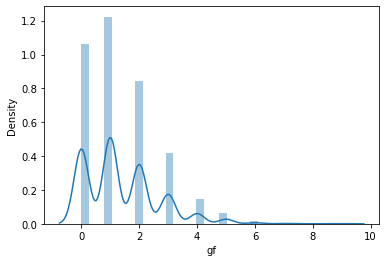

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


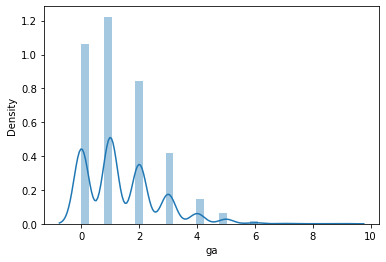

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


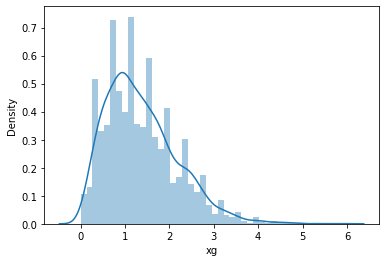

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


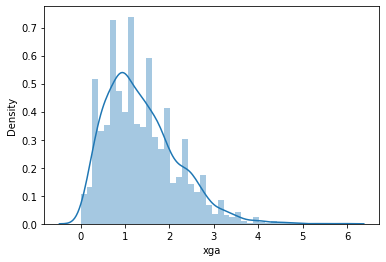

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


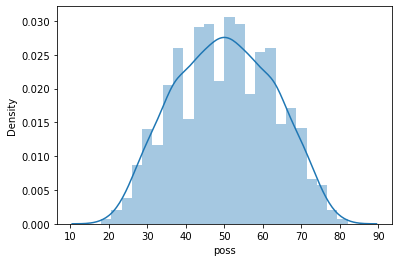

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


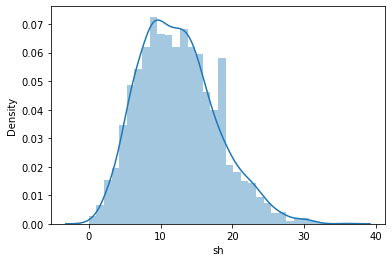

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


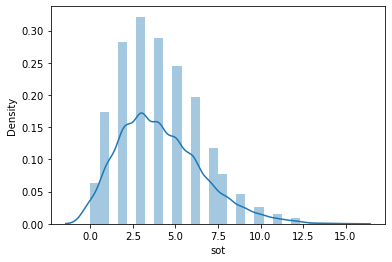

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


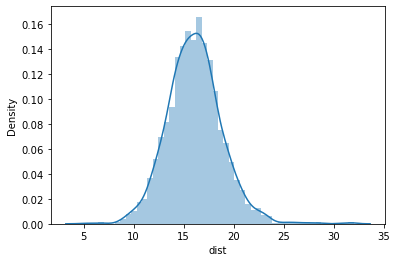

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


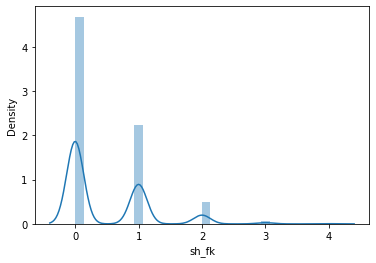

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


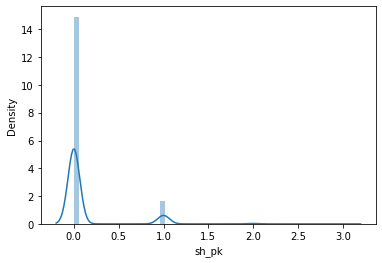

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


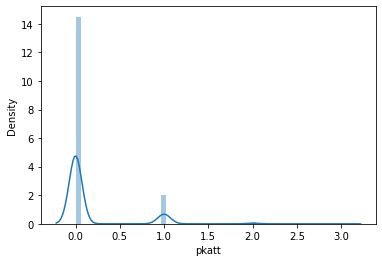

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


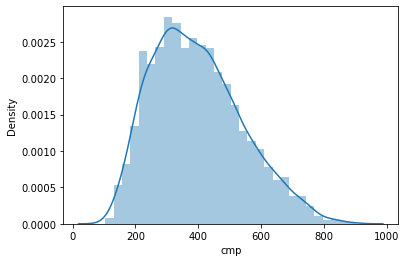

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


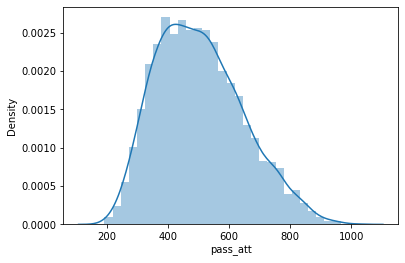

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


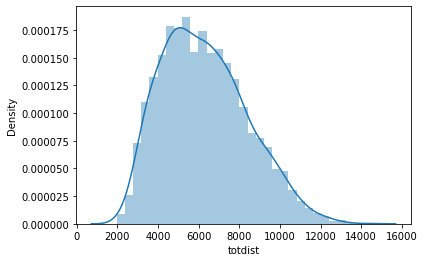

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


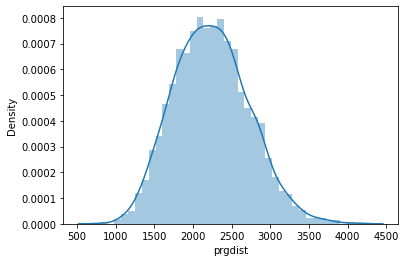

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


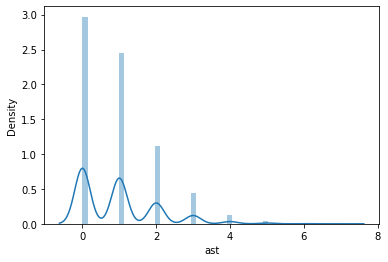

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


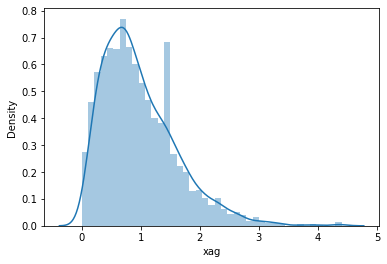

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


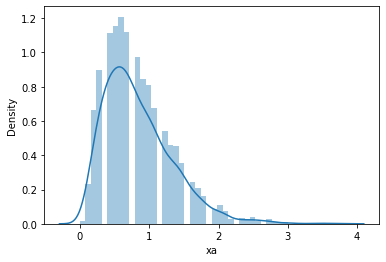

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


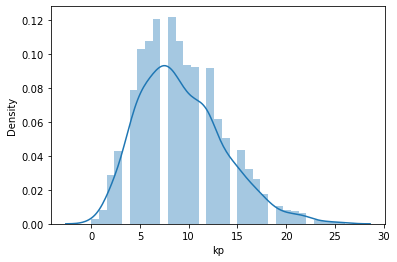

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


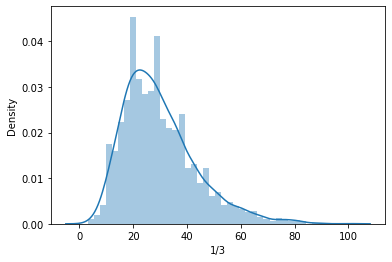

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


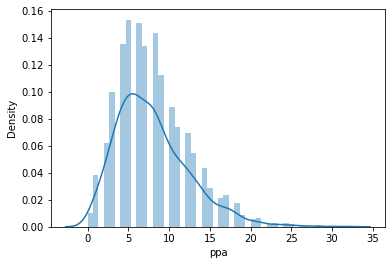

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


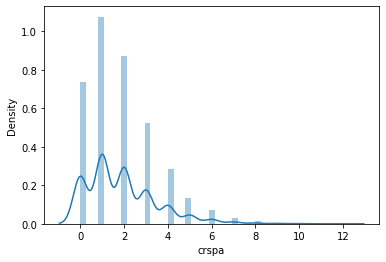

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


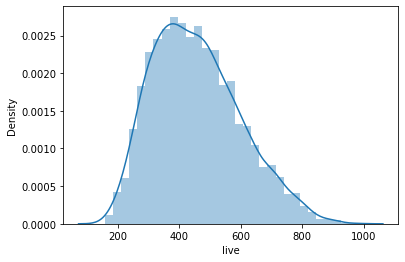

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


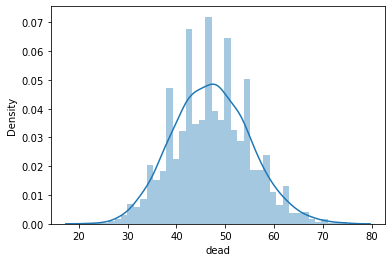

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


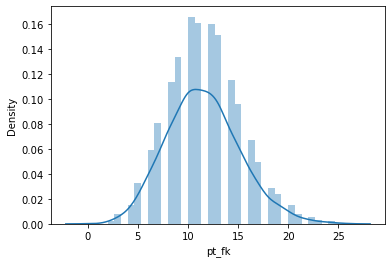

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


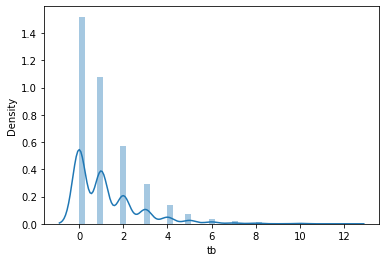

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


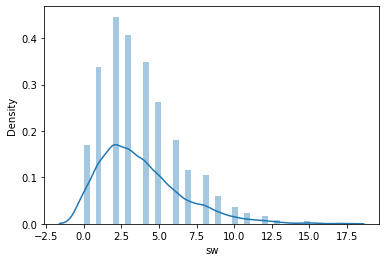

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


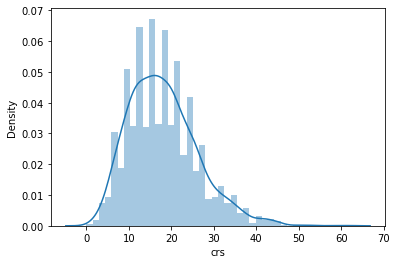

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


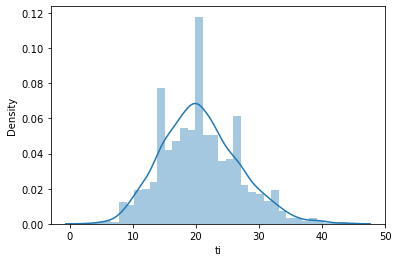

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


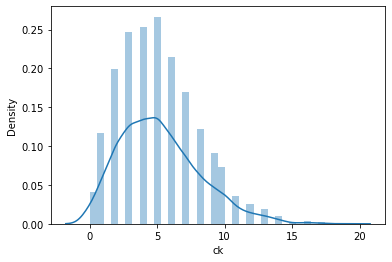

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


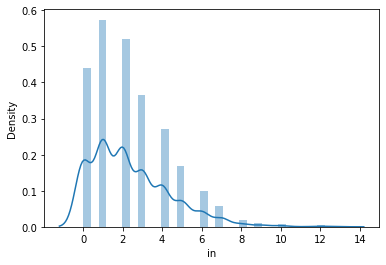

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


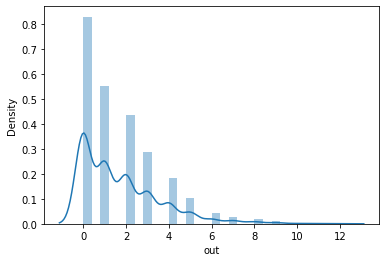

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


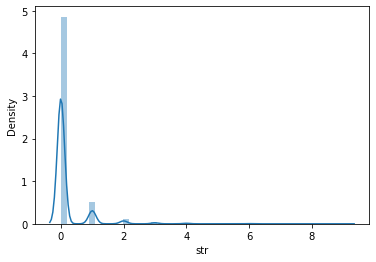

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


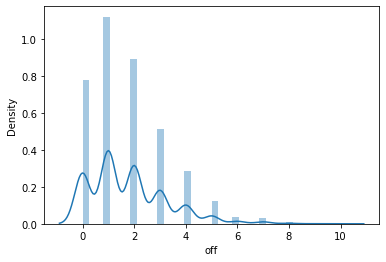

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


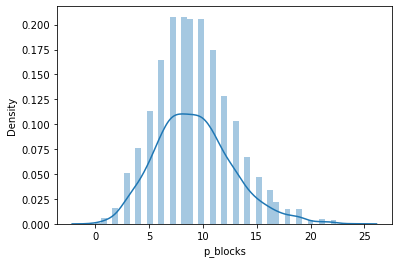

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


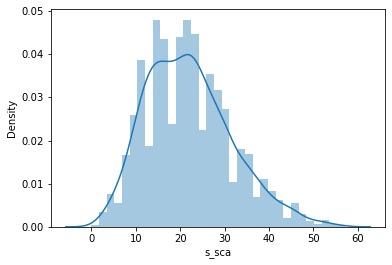

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


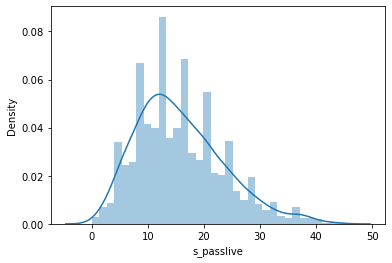

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


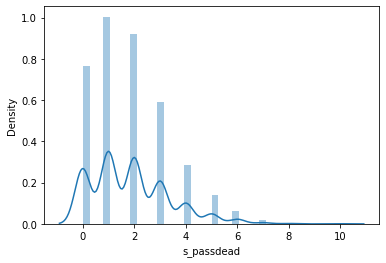

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


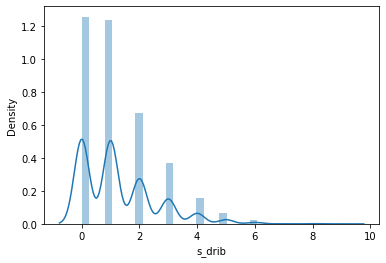

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


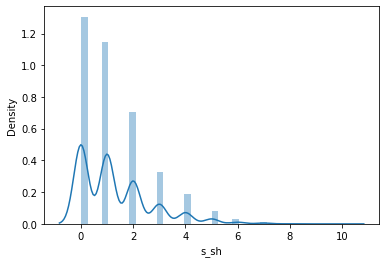

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


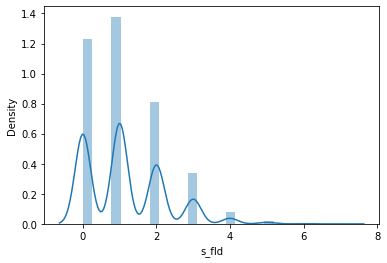

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


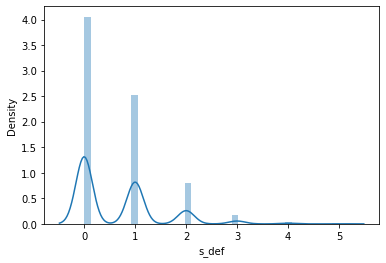

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


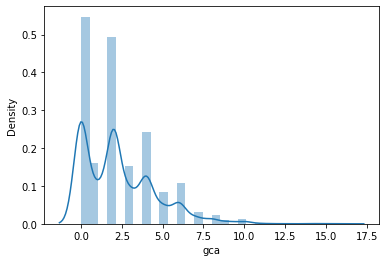

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


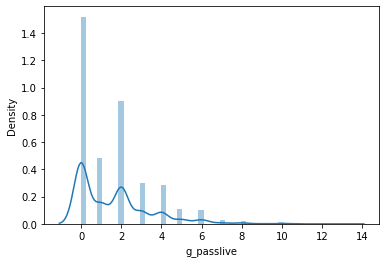

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


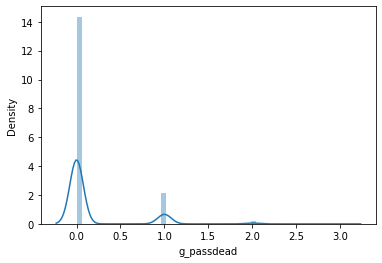

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


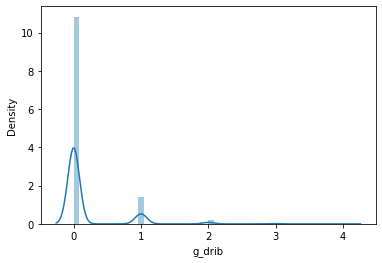

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


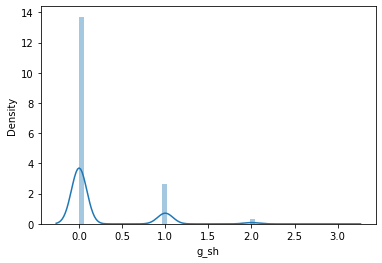

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


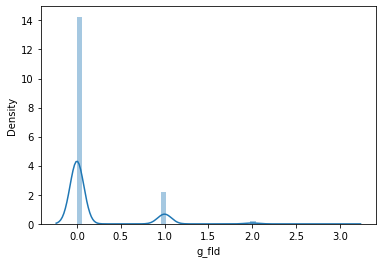

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


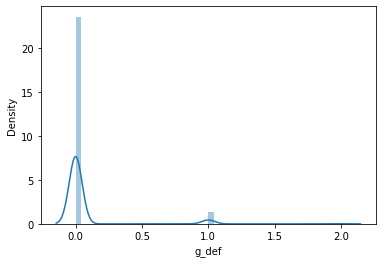

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


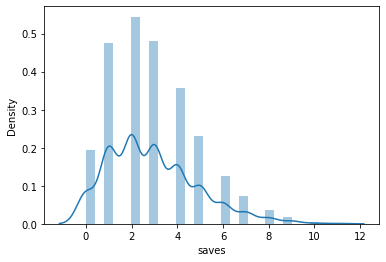

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


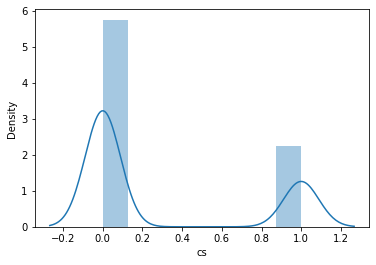

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


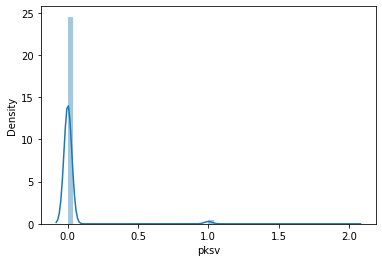

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


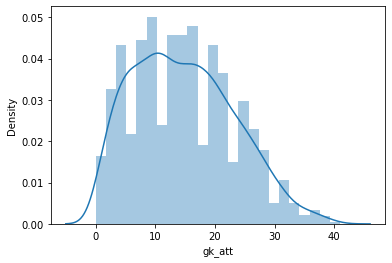

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


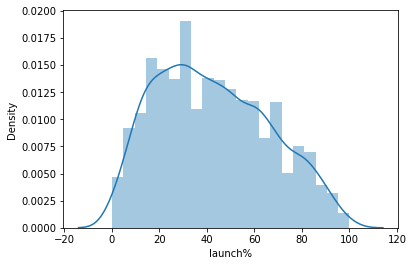

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


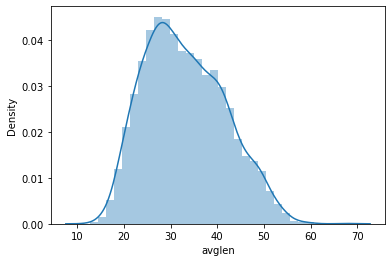

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


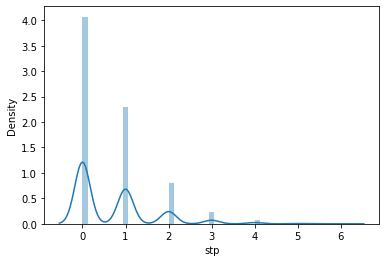

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


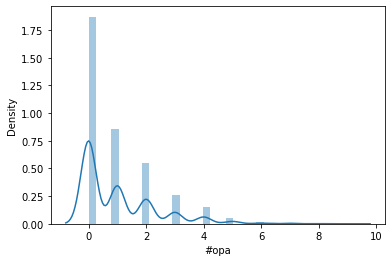

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


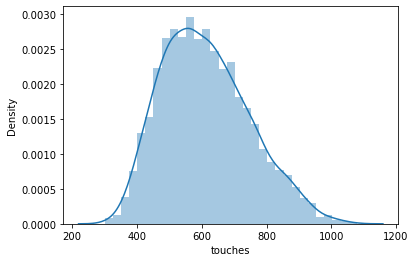

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


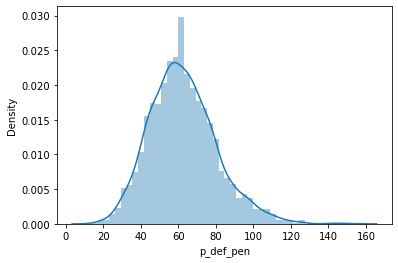

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


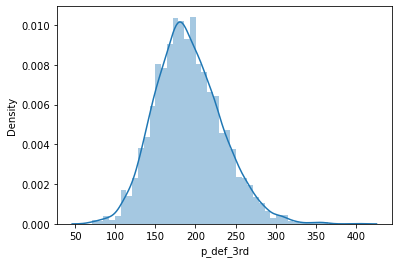

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


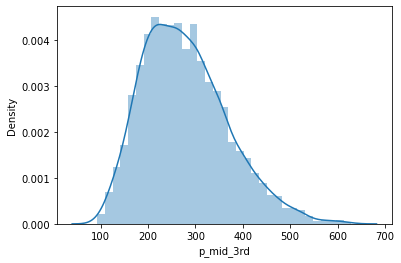

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


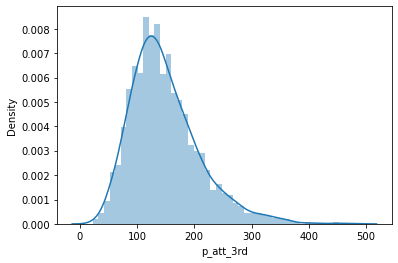

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


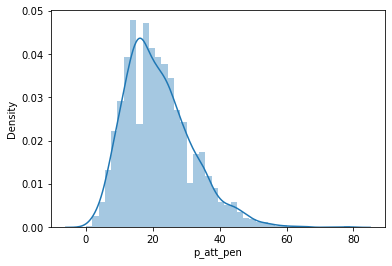

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


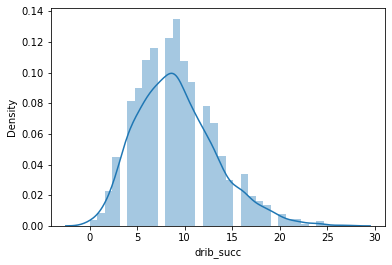

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


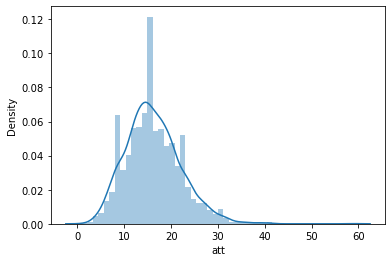

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


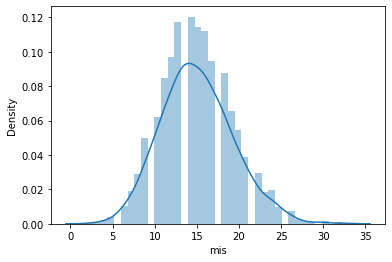

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


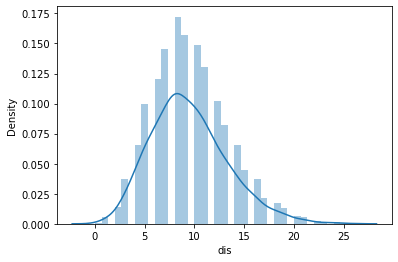

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


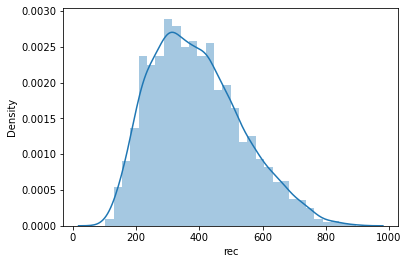

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


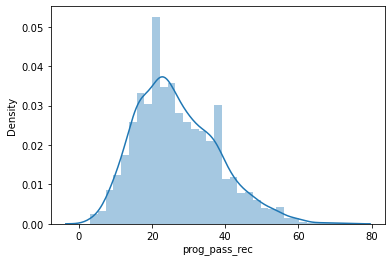

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


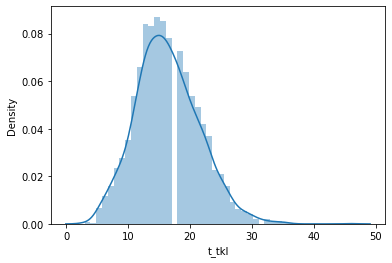

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


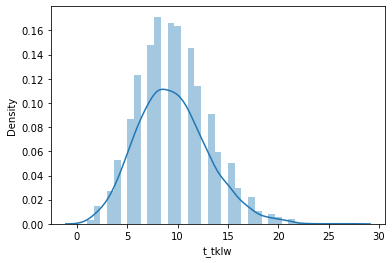

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


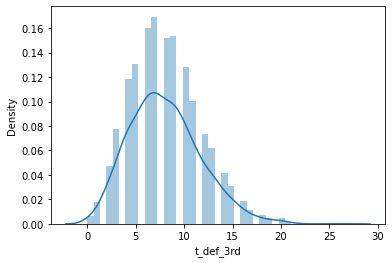

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


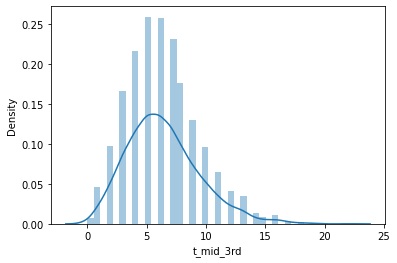

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


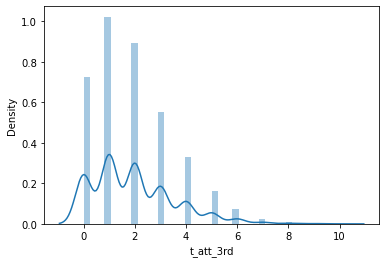

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


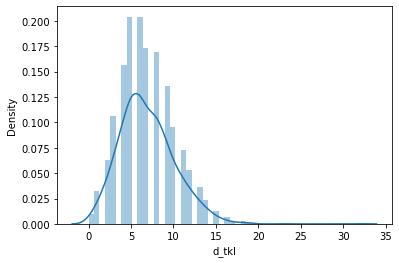

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


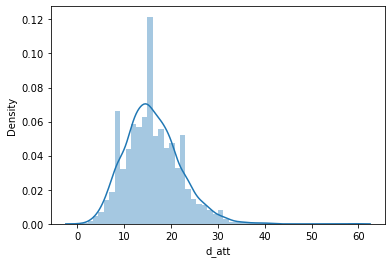

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


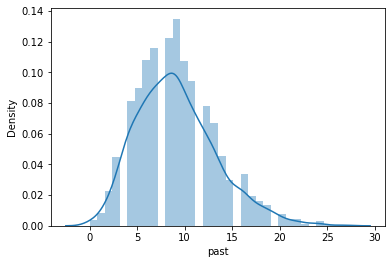

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


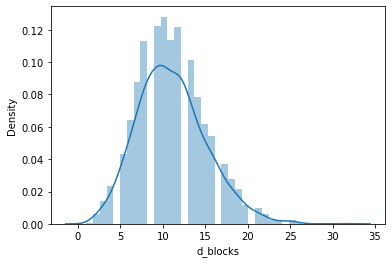

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


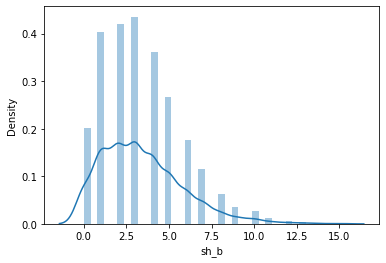

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


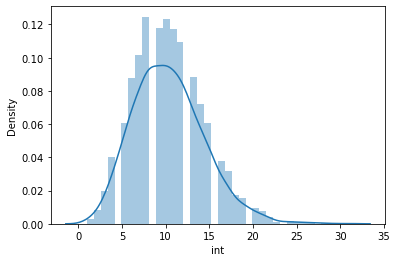

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


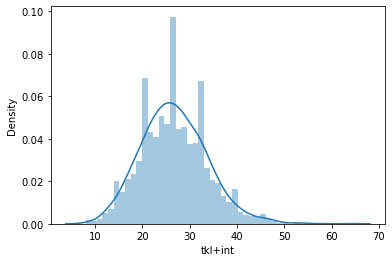

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


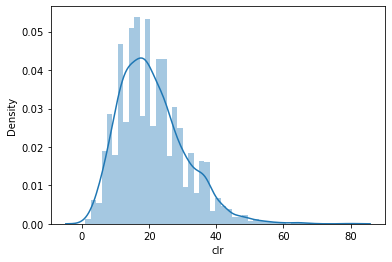

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


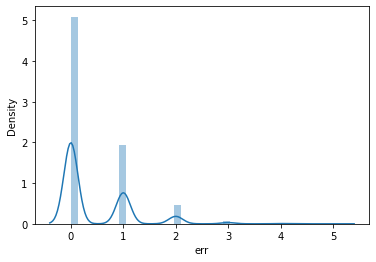

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


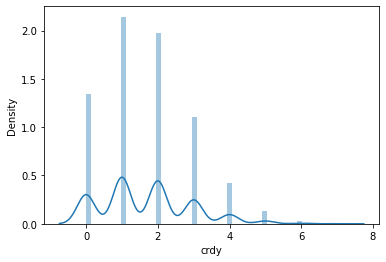

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


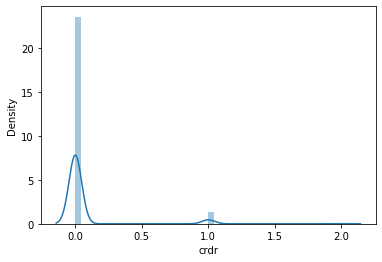

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


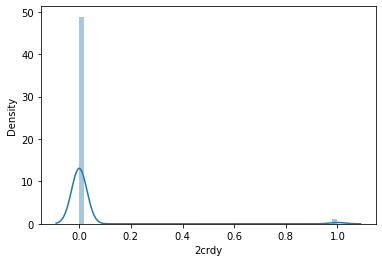

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


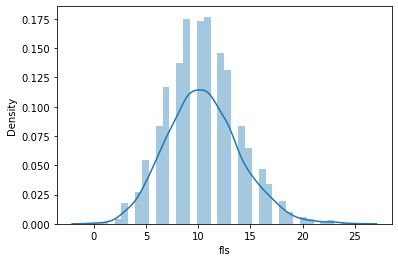

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


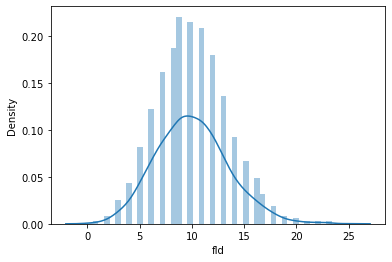

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


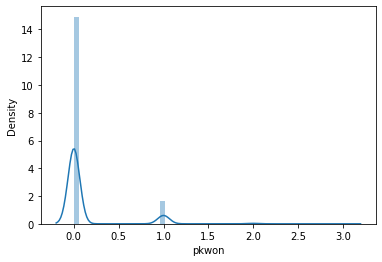

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


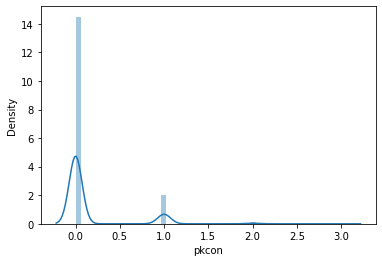

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


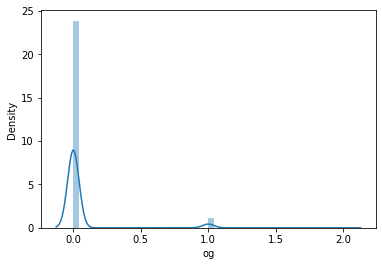

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


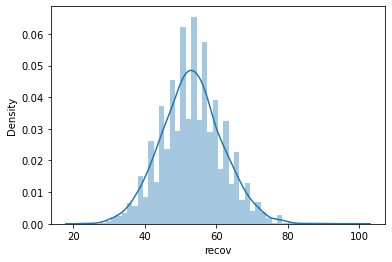

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


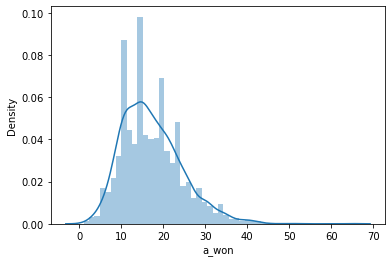

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


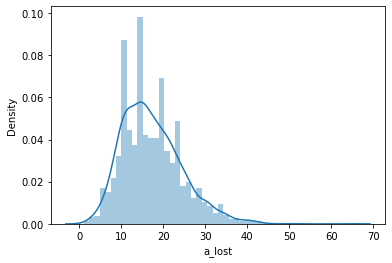

In [68]:
def plot_num(df):
    for col in df.columns:
        sns.distplot(a=df[col])
        plt.show()
    return None

plot_num(numerical)

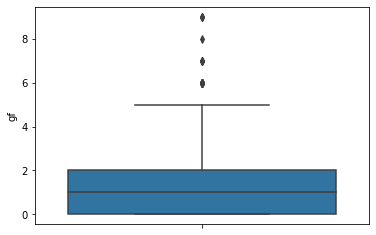

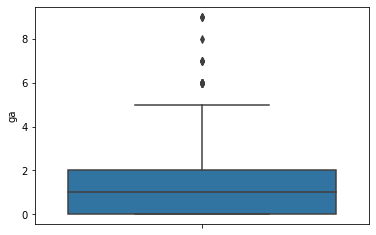

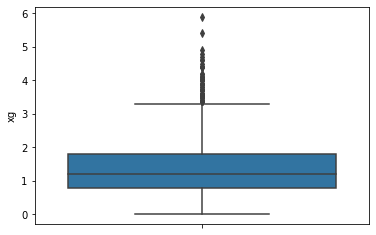

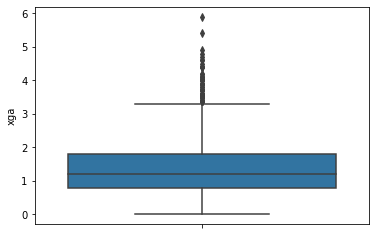

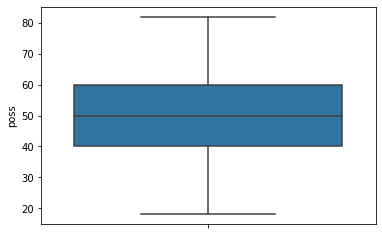

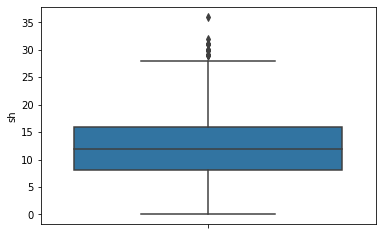

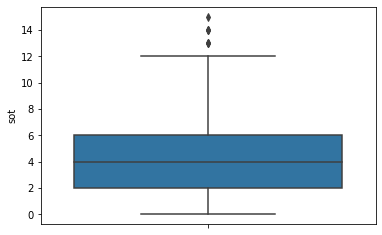

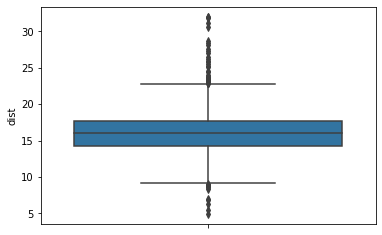

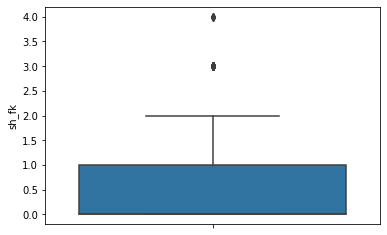

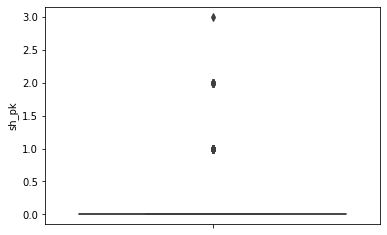

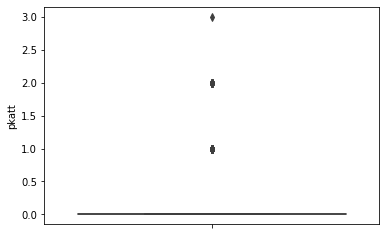

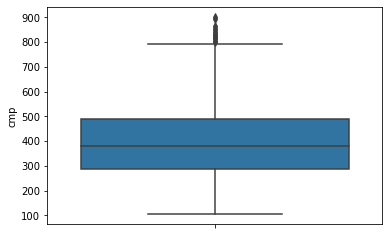

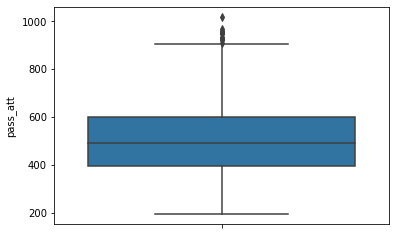

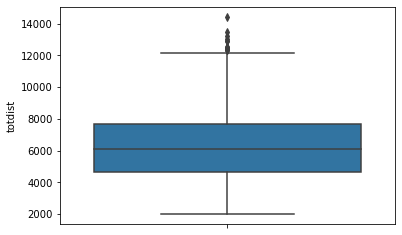

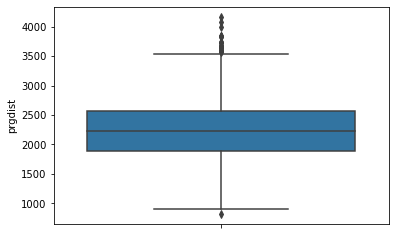

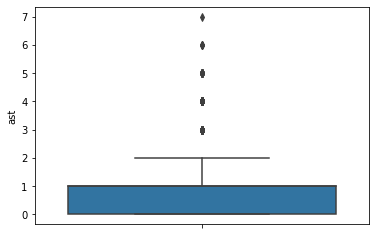

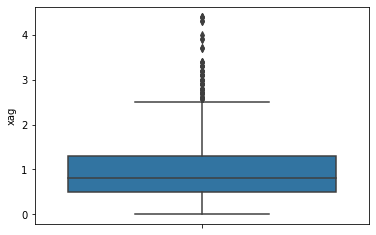

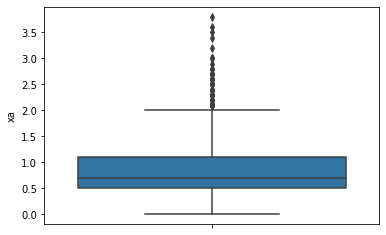

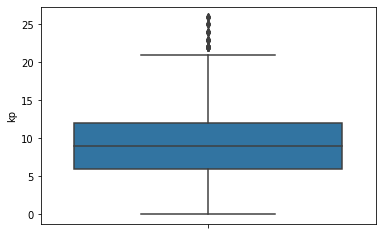

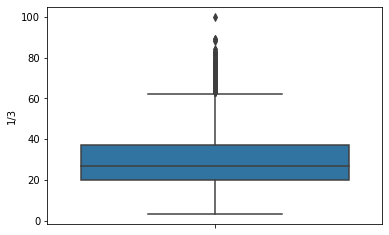

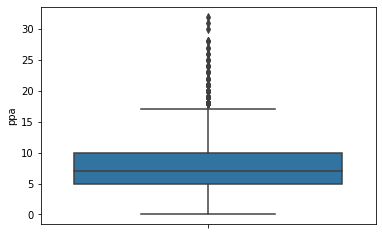

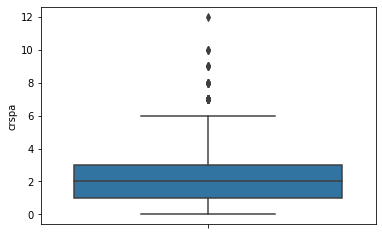

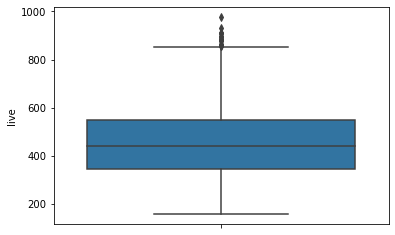

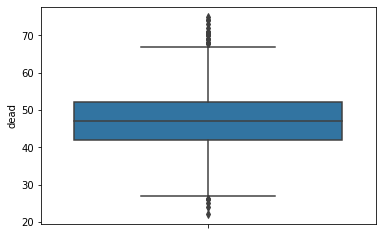

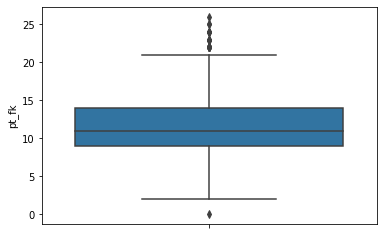

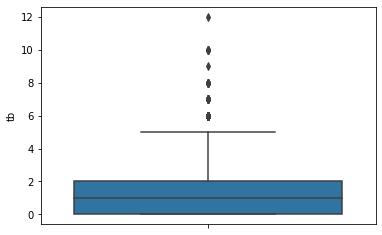

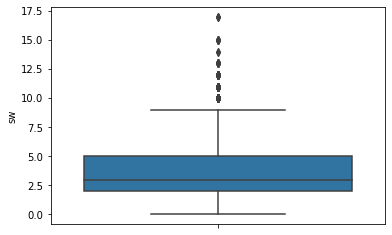

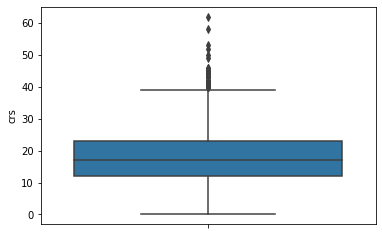

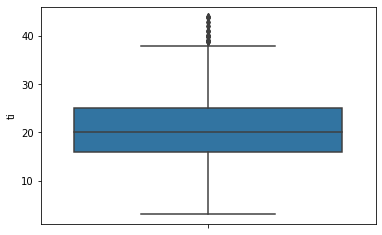

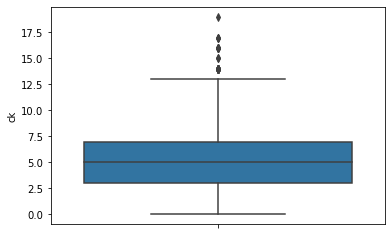

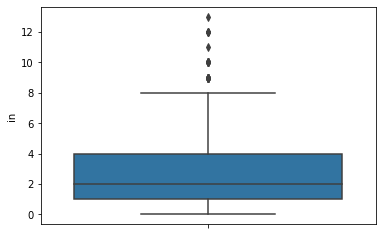

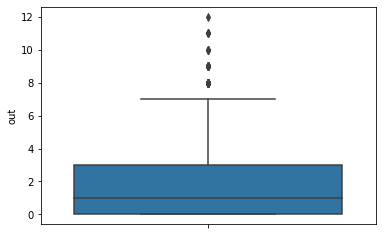

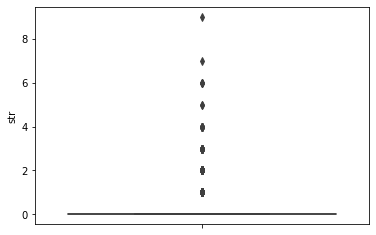

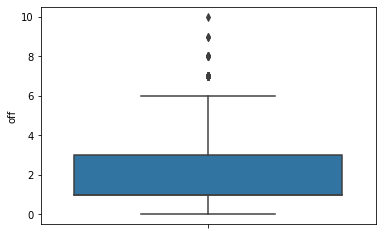

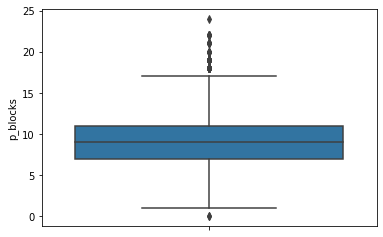

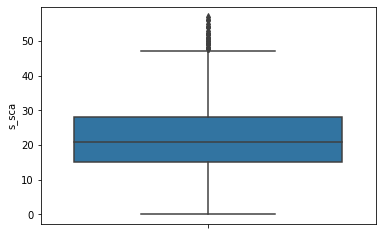

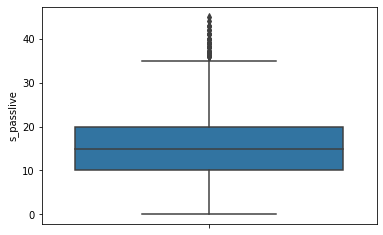

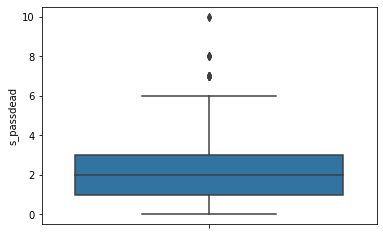

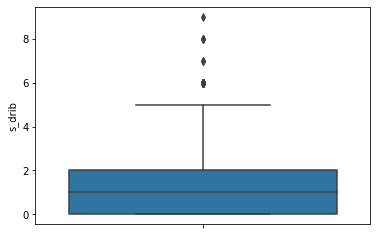

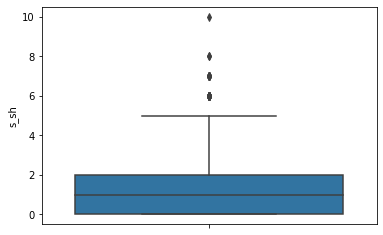

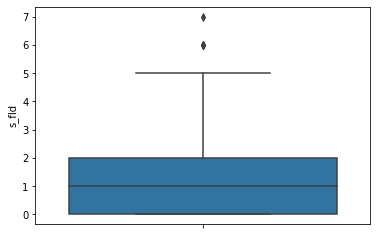

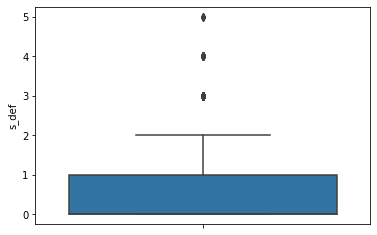

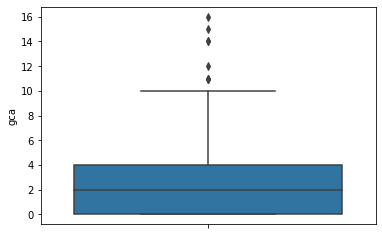

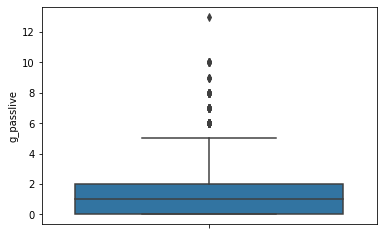

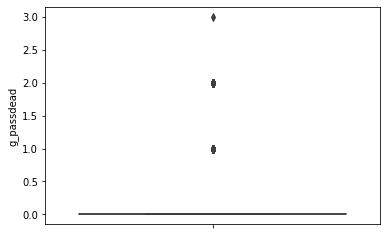

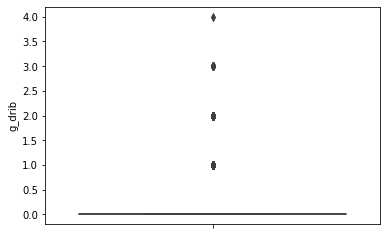

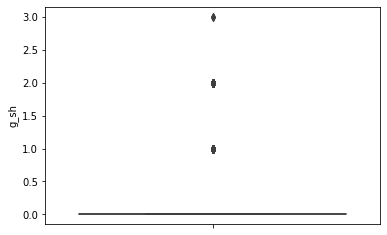

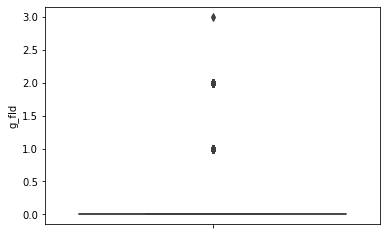

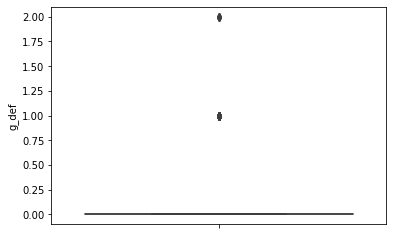

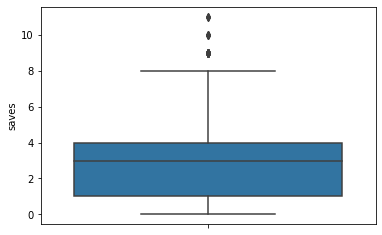

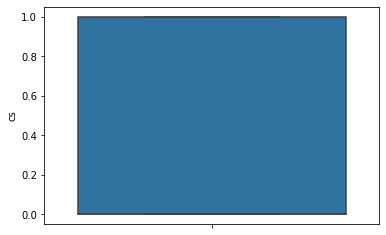

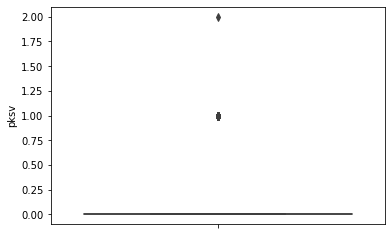

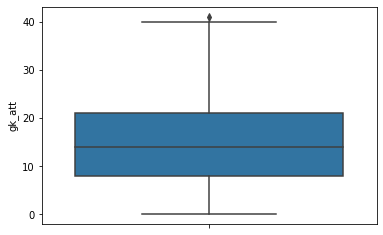

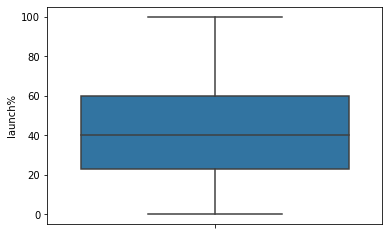

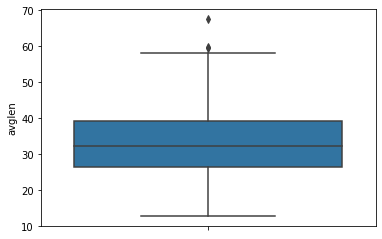

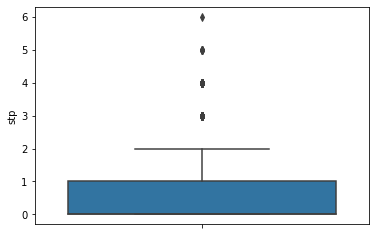

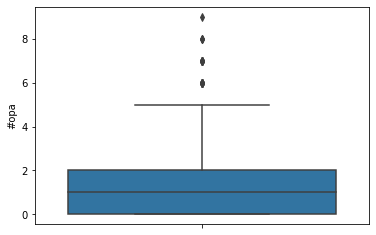

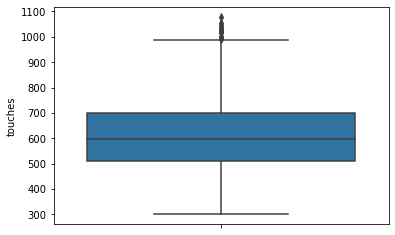

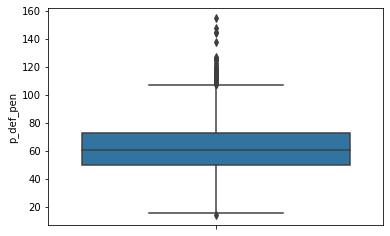

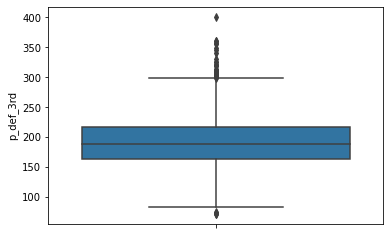

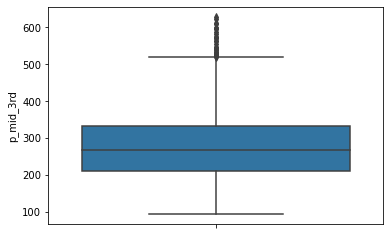

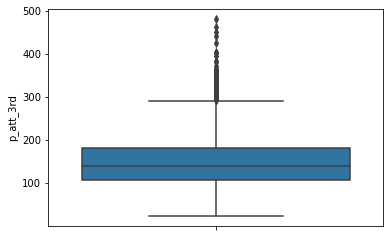

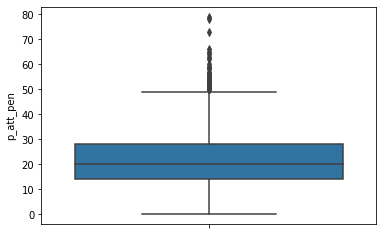

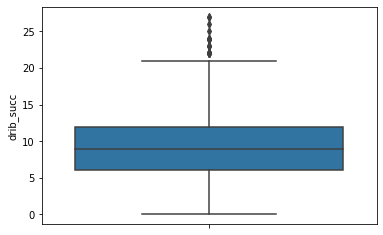

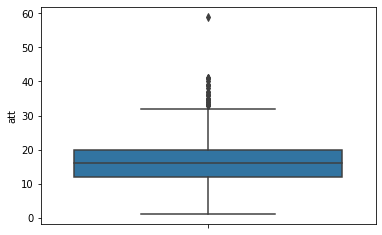

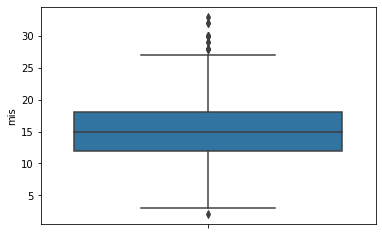

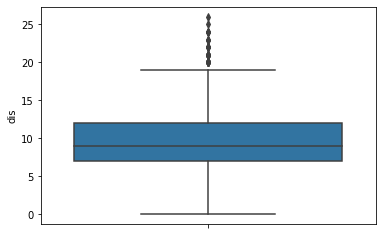

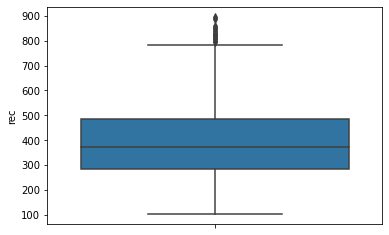

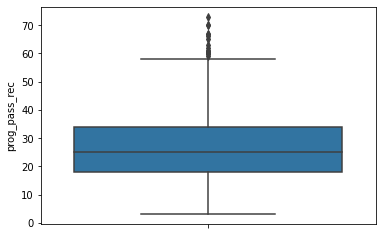

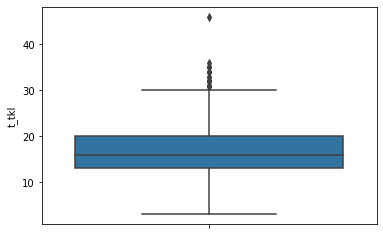

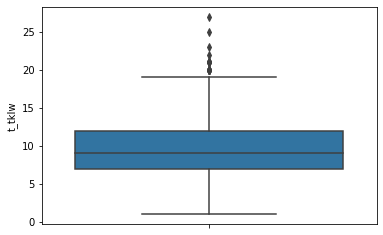

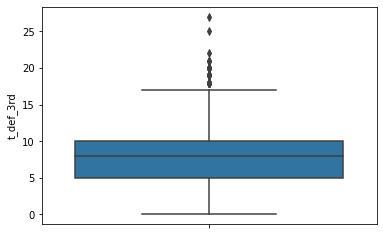

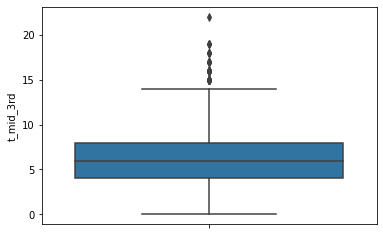

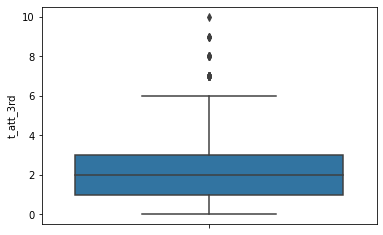

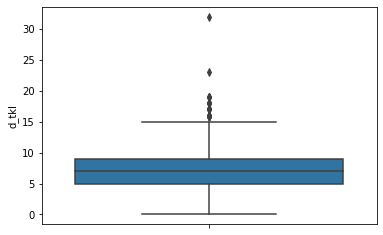

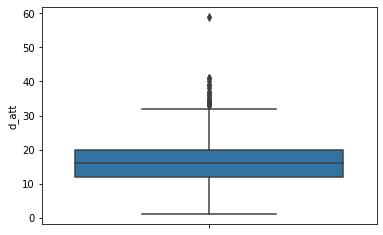

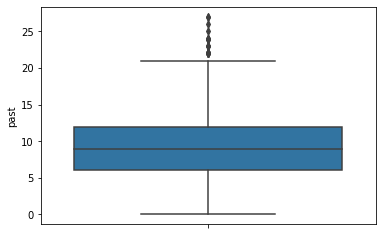

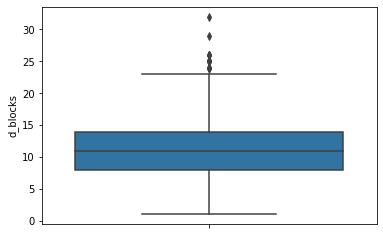

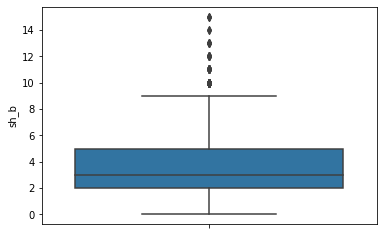

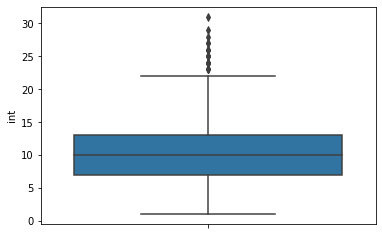

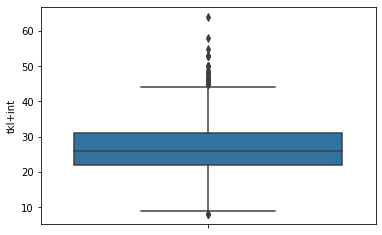

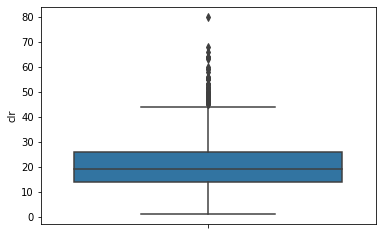

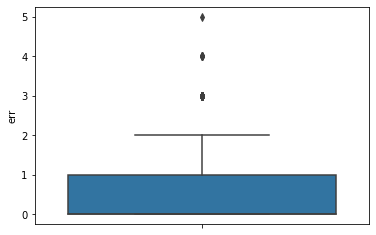

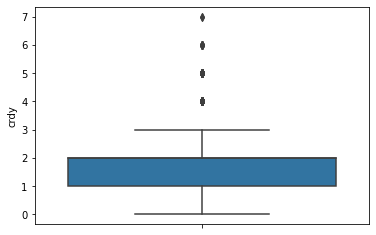

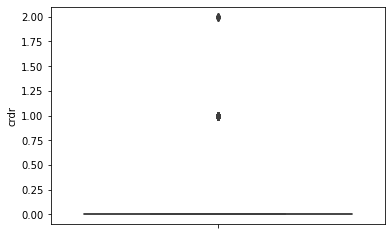

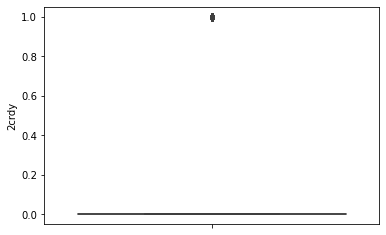

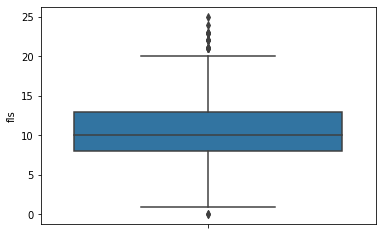

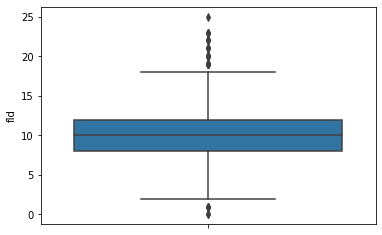

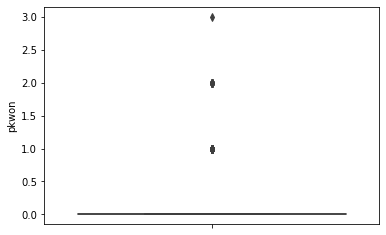

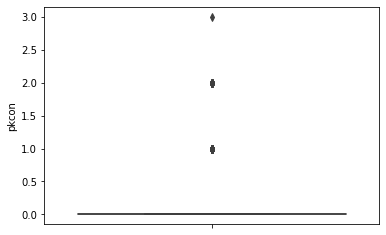

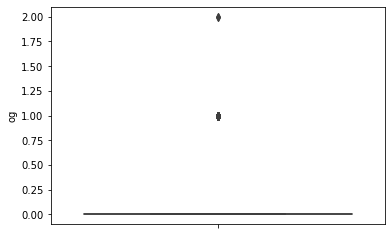

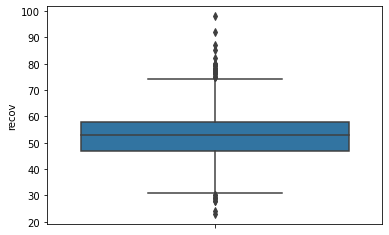

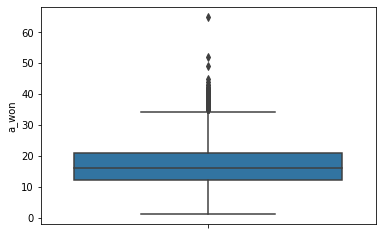

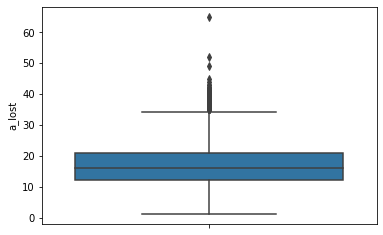

In [69]:
# Observe outliers if any
def outlier(df):
    for col in df.columns:
        sns.boxplot(y=df[col])
        plt.show()
    return None

outlier(numerical)

In [70]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
gf,3292.0,1.383354,1.279315,0.00000,0.00000,1.00000,2.00000,9.0000
ga,3292.0,1.383354,1.279315,0.00000,0.00000,1.00000,2.00000,9.0000
xg,3292.0,1.368803,0.802228,0.00000,0.80000,1.20000,1.80000,5.9000
xga,3292.0,1.368803,0.802228,0.00000,0.80000,1.20000,1.80000,5.9000
poss,3292.0,50.000911,12.657768,18.00000,40.00000,50.00000,60.00000,82.0000
sh,3292.0,12.367861,5.413150,0.00000,8.00000,12.00000,16.00000,36.0000
sot,3292.0,4.127582,2.435083,0.00000,2.00000,4.00000,6.00000,15.0000
dist,3292.0,16.083601,2.763879,4.84632,14.26464,16.00200,17.73936,32.0040
sh_fk,3292.0,0.464763,0.673975,0.00000,0.00000,0.00000,1.00000,4.0000
sh_pk,3292.0,0.111482,0.332612,0.00000,0.00000,0.00000,0.00000,3.0000


In [71]:
numerical.columns

Index(['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'sh_fk', 'sh_pk',
       'pkatt', 'cmp', 'pass_att', 'totdist', 'prgdist', 'ast', 'xag', 'xa',
       'kp', '1/3', 'ppa', 'crspa', 'live', 'dead', 'pt_fk', 'tb', 'sw', 'crs',
       'ti', 'ck', 'in', 'out', 'str', 'off', 'p_blocks', 's_sca',
       's_passlive', 's_passdead', 's_drib', 's_sh', 's_fld', 's_def', 'gca',
       'g_passlive', 'g_passdead', 'g_drib', 'g_sh', 'g_fld', 'g_def', 'saves',
       'cs', 'pksv', 'gk_att', 'launch%', 'avglen', 'stp', '#opa', 'touches',
       'p_def_pen', 'p_def_3rd', 'p_mid_3rd', 'p_att_3rd', 'p_att_pen',
       'drib_succ', 'att', 'mis', 'dis', 'rec', 'prog_pass_rec', 't_tkl',
       't_tklw', 't_def_3rd', 't_mid_3rd', 't_att_3rd', 'd_tkl', 'd_att',
       'past', 'd_blocks', 'sh_b', 'int', 'tkl+int', 'clr', 'err', 'crdy',
       'crdr', '2crdy', 'fls', 'fld', 'pkwon', 'pkcon', 'og', 'recov', 'a_won',
       'a_lost'],
      dtype='object')

In [72]:
def value_count(df):
    for column in df.columns:
        print(column, ":", len(df[column].unique())) # number of unique value for each column
    
value_count(numerical)

gf : 10
ga : 10
xg : 51
xga : 51
poss : 65
sh : 34
sot : 16
dist : 190
sh_fk : 5
sh_pk : 4
pkatt : 4
cmp : 623
pass_att : 618
totdist : 2691
prgdist : 1654
ast : 8
xag : 40
xa : 36
kp : 27
1/3 : 85
ppa : 32
crspa : 12
live : 619
dead : 53
pt_fk : 26
tb : 12
sw : 17
crs : 53
ti : 42
ck : 19
in : 14
out : 13
str : 9
off : 11
p_blocks : 24
s_sca : 58
s_passlive : 46
s_passdead : 10
s_drib : 10
s_sh : 10
s_fld : 8
s_def : 6
gca : 16
g_passlive : 12
g_passdead : 4
g_drib : 5
g_sh : 4
g_fld : 4
g_def : 3
saves : 12
cs : 2
pksv : 3
gk_att : 42
launch% : 439
avglen : 427
stp : 7
#opa : 10
touches : 601
p_def_pen : 114
p_def_3rd : 233
p_mid_3rd : 435
p_att_3rd : 324
p_att_pen : 68
drib_succ : 28
att : 42
mis : 31
dis : 27
rec : 621
prog_pass_rec : 66
t_tkl : 35
t_tklw : 25
t_def_3rd : 25
t_mid_3rd : 21
t_att_3rd : 11
d_tkl : 22
d_att : 42
past : 28
d_blocks : 28
sh_b : 16
int : 30
tkl+int : 47
clr : 63
err : 6
crdy : 8
crdr : 3
2crdy : 2
fls : 26
fld : 25
pkwon : 4
pkcon : 4
og : 3
recov : 60
a

In [73]:
# No need to remove outliers since the data used in this project is real data.

# Check categorical columns

In [74]:
categorical.head()

,time,comp,round,day,venue,result,opponent,captain,formation,referee,match_report,season,team
0,20:00,Premier League,Matchweek 1,Fri,Away,Win,Crystal Palace,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,2022,Arsenal
1,15:00,Premier League,Matchweek 2,Sat,Home,Win,Leicester City,Martin Ødegaard,4-2-3-1,Darren England,Match Report,2022,Arsenal
2,17:30,Premier League,Matchweek 3,Sat,Away,Win,Bournemouth,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,2022,Arsenal
3,17:30,Premier League,Matchweek 4,Sat,Home,Win,Fulham,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,2022,Arsenal
4,19:30,Premier League,Matchweek 5,Wed,Home,Win,Aston Villa,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,2022,Arsenal


In [75]:
categorical['venue'].value_counts(dropna=False)

Away    1646
Home    1646
Name: venue, dtype: int64

In [76]:
categorical['time'].value_counts(dropna=False)

15:00    972
20:00    384
17:30    290
14:00    286
12:30    262
16:30    218
19:45    148
18:00    148
20:15    132
16:00    104
19:30     98
12:00     72
19:15     38
13:30     34
14:15     34
14:05     30
19:00     28
16:15      8
17:45      2
17:15      2
20:30      2
Name: time, dtype: int64

In [77]:
categorical['result'].value_counts(dropna=False)

Win     1279
Lose    1279
Draw     734
Name: result, dtype: int64

In [78]:
categorical['day'].value_counts(dropna=False)

Sat    1492
Sun     890
Wed     312
Mon     186
Tue     184
Thu     122
Fri     106
Name: day, dtype: int64

In [79]:
categorical['referee'].value_counts(dropna=False)

Anthony Taylor       262
Michael Oliver       254
Martin Atkinson      226
Paul Tierney         214
Mike Dean            214
Craig Pawson         210
Jonathan Moss        204
Andre Marriner       198
Kevin Friend         190
Chris Kavanagh       188
Stuart Attwell       182
David Coote          148
Graham Scott         126
Simon Hooper         110
Andy Madley          106
Lee Mason             92
Peter Bankes          90
Darren England        66
Robert Jones          60
Lee Probert           36
Jarred Gillett        30
Roger East            20
John Brooks           20
Michael Salisbury     18
Tony Harrington       16
Thomas Bramall         6
Robert Madley          2
Oliver Langford        2
Tim Robinson           2
Name: referee, dtype: int64

In [80]:
categorical['captain'].value_counts(dropna=False)

Conor Coady                  152
Hugo Lloris                  142
Lewis Dunk                   132
César Azpilicueta            127
Kasper Schmeichel            126
Luka Milivojević             104
Jordan Henderson             103
Ben Mee                      102
James Ward-Prowse             98
Jamaal Lascelles              98
Séamus Coleman                97
Harry Maguire                 90
Declan Rice                   79
Mark Noble                    72
Pierre-Emerick Aubameyang     63
Jack Grealish                 60
Troy Deeney                   54
Liam Cooper                   51
Tyrone Mings                  50
Pierre Højbjerg               48
Grant Hanley                  47
Pontus Jansson                43
Fernandinho                   41
David Silva                   37
Ashley Young                  36
Jonjo Shelvey                 35
Steve Cook                    34
Sean Morrison                 34
Tom Cairney                   33
Moussa Sissoko                31
Luke Aylin

In [81]:
categorical['round'].value_counts(dropna=False)

Matchweek 1     100
Matchweek 14    100
Matchweek 3     100
Matchweek 4     100
Matchweek 5     100
Matchweek 6     100
Matchweek 2     100
Matchweek 9     100
Matchweek 10    100
Matchweek 11    100
Matchweek 13    100
Matchweek 12     98
Matchweek 8      94
Matchweek 26     80
Matchweek 37     80
Matchweek 33     80
Matchweek 36     80
Matchweek 35     80
Matchweek 34     80
Matchweek 30     80
Matchweek 32     80
Matchweek 31     80
Matchweek 29     80
Matchweek 28     80
Matchweek 27     80
Matchweek 20     80
Matchweek 25     80
Matchweek 24     80
Matchweek 23     80
Matchweek 22     80
Matchweek 21     80
Matchweek 19     80
Matchweek 18     80
Matchweek 17     80
Matchweek 16     80
Matchweek 15     80
Matchweek 7      80
Matchweek 38     80
Name: round, dtype: int64

In [82]:
categorical['formation'].value_counts(dropna=False)

4-2-3-1      768
4-3-3        656
4-4-2        451
3-4-3        359
4-1-4-1      205
3-5-2        202
4-4-1-1      131
5-4-1         96
3-4-1-2       82
5-3-2         69
4-2-2-2       57
4-5-1         56
4-1-2-1-2     44
4-3-1-2       39
3-5-1-1       22
3-1-4-2       21
4-3-2-1       20
3-3-3-1       12
4-1-3-2        2
Name: formation, dtype: int64

In [83]:
categorical['comp'].value_counts(dropna=False)

Premier League    3292
Name: comp, dtype: int64

In [84]:
categorical['match_report'].value_counts(dropna=False)

Match Report    3292
Name: match_report, dtype: int64

In [85]:
data = data.drop(['comp','captain','match_report','season'],axis=1) # categorical columns with very low variance are dropped.

In [86]:
categorical.shape

(3292, 13)

# Split data into X / y

In [87]:
X = data.drop('result', axis=1)
y = data['result']

# Train test split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(2633, 103)

(659, 103)

(2633,)

(659,)

In [90]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [91]:
X_train_cat.shape

(2633, 8)

In [92]:
X_train_cat.head()

,time,round,day,venue,opponent,formation,referee,team
2986,17:30,Matchweek 37,Sat,Away,Cardiff City,4-4-2,Michael Oliver,Crystal Palace
2880,12:30,Matchweek 7,Sat,Home,Manchester Utd,4-1-4-1,Michael Oliver,West Ham United
2642,20:00,Matchweek 35,Mon,Home,Burnley,4-3-3,Kevin Friend,Chelsea
436,12:30,Matchweek 34,Sat,Home,Manchester Utd,4-2-3-1,Craig Pawson,Arsenal
2215,12:30,Matchweek 26,Sat,Home,Crystal Palace,4-4-2,David Coote,Everton


In [93]:
X_test_cat.shape

(659, 8)

In [94]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,time_12:30,time_13:30,time_14:00,time_14:05,time_14:15,time_15:00,time_16:00,time_16:15,time_16:30,time_17:15,time_17:30,time_17:45,time_18:00,time_19:00,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:30,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Huddersfield,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Nott'ham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Brom,opponent_West Ham,opponent_Wolves,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Oliver Langford,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Robert Madley,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Cardiff City,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Huddersfield Town,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [95]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,time_12:30,time_13:30,time_14:00,time_14:05,time_14:15,time_15:00,time_16:00,time_16:15,time_16:30,time_17:15,time_17:30,time_17:45,time_18:00,time_19:00,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:30,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Huddersfield,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Nott'ham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Brom,opponent_West Ham,opponent_Wolves,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Oliver Langford,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Robert Madley,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Cardiff City,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Huddersfield Town,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [96]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)

(2633, 94)


In [97]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale.head()

(659, 94)


,gf,ga,xg,xga,poss,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost
0,0.222222,0.222222,0.118644,0.220339,0.112903,0.166667,0.200000,0.353535,0.0,0.000000,0.000000,0.061924,0.069010,0.114376,0.332025,0.142857,0.136364,0.078947,0.153846,0.123711,0.12500,0.1,0.054377,0.471698,0.333333,0.083333,0.235294,0.080645,0.390244,0.052632,0.076923,0.000000,0.0,0.2,0.500000,0.157895,0.113636,0.125,0.000000,0.2,0.000000,0.2,0.1250,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.545455,0.0,0.0,0.756098,0.900,0.764120,0.166667,0.0,0.127517,0.723881,0.486207,0.069030,0.069717,0.088608,0.185185,0.137931,0.322581,0.458333,0.063325,0.134328,0.279070,0.192308,0.259259,0.318182,0.1,0.21875,0.310345,0.444444,0.433333,0.400000,0.500000,0.392857,0.776119,0.2,0.142857,0.0,0.0,0.166667,0.291667,0.000000,0.000000,0.0,0.432432,0.250000,0.375000
1,0.000000,0.111111,0.067797,0.338983,0.193548,0.194444,0.000000,0.461279,0.0,0.000000,0.000000,0.156785,0.190104,0.182488,0.344703,0.000000,0.090909,0.105263,0.230769,0.175258,0.28125,0.4,0.190981,0.226415,0.125000,0.000000,0.352941,0.225806,0.341463,0.105263,0.153846,0.000000,0.0,0.5,0.333333,0.228070,0.272727,0.125,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.181818,0.0,0.0,0.609756,0.773,0.591362,0.166667,0.0,0.174497,0.365672,0.393103,0.145522,0.117647,0.151899,0.111111,0.068966,0.516129,0.333333,0.155673,0.208955,0.209302,0.230769,0.259259,0.181818,0.1,0.15625,0.224138,0.333333,0.266667,0.133333,0.428571,0.303571,0.238806,0.0,0.000000,0.0,0.0,0.625000,0.125000,0.000000,0.333333,0.0,0.432432,0.218750,0.281250
2,0.111111,0.333333,0.186441,0.355932,0.806452,0.444444,0.333333,0.299663,0.0,0.000000,0.000000,0.462451,0.532552,0.546056,0.653184,0.142857,0.204545,0.263158,0.461538,0.391753,0.31250,0.6,0.503979,0.811321,0.208333,0.000000,0.647059,0.661290,0.853659,0.473684,0.384615,0.083333,0.0,0.1,0.375000,0.561404,0.500000,0.500,0.111111,0.1,0.666667,0.0,0.1250,0.0,0.333333,0.000000,0.000000,0.333333,0.0,0.181818,0.0,0.0,0.414634,0.400,0.330565,0.000000,0.0,0.536913,0.276119,0.372414,0.416045,0.405229,0.430380,0.222222,0.137931,0.580645,0.333333,0.452507,0.567164,0.186047,0.153846,0.259259,0.181818,0.0,0.12500,0.086207,0.074074,0.200000,0.133333,0.357143,0.250000,0.119403,0.0,0.142857,0.0,0.0,0.333333,0.250000,0.000000,0.333333,0.0,0.216216,0.656250,0.453125
3,0.444444,0.111111,0.474576,0.271186,0.790323,0.500000,0.466667,0.397306,0.0,0.333333,0.333333,0.545455,0.554688,0.558553,0.578630,0.428571,0.431818,0.289474,0.576923,0.371134,0.50000,0.2,0.539788,0.603774,0.708333,0.083333,0.058824,0.338710,0.487805,0.368421,0.230769,0.333333,0.0,0.2,0.291667,0.631579,0.568182,0.375,0.333333,0.2,0.333333,0.2,0.4375,0.4,0.000000,0.333333,0.333333,0.333333,0.0,0.090909,0.0,0.0,0.073171,0.087,0.207641,0.166667,0.0,0.586577,0.238806,0.334483,0.492537,0.420479,0.518987,0.370370,0.241379,0.548387,0.166667,0.546174,0.567164,0.325581,0.307692,0.333333,0.227273,0.3,0.21875,0.224138,0.259259,0.166667,0.066667,0.285714,0.321429,0.164179,0.0,0.142857,0.0,0.0,0.416667,0.708333,0.333333,0.333333,0.0,0.283784,0.359375,0.312500
4,0.000000,0.333333,0.101695,0.474576,0.532258,0.305556,0.133333,0.555556,0.0,0.000000,0.000000,0.368906,0.378906,0.391873,0.419861,0.000000,0.136364,0.184211,0.346154,0.278351,0.28125,0.4,0.363395,0.547170,0.625000,0.000000,0.176471,0.354839,0.439024,0.157895,0.153846,0.000000,0.0,0.3,0.125000,0.403509,0.363636,0.250,0.000000,0.1,0.333333,0.4,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.0

In [98]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)
X_train.head()

,gf,ga,xg,xga,poss,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,time_12:30,time_13:30,time_14:00,time_14:05,time_14:15,time_15:00,time_16:00,time_16:15,time_16:30,time_17:15,time_17:30,time_17:45,time_18:00,time_19:00,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:30,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Huddersfield,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Nott'ham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Brom,opponent_West Ham,opponent_Wolves,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Oliver Langford,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Robert Madley,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Cardiff City,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Huddersfield Town,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,0.333333,0.222222,0.271186,0.322034,0.677419,0.583333,0.466667,0.444444,0.25,0.000000,0.000000,0.342556,0.381510,0.255235,0.470269,0.285714,0.204545,0.394737,0.576923,0.226804,0.34375,0.3,0.367374,0.547170,0.500000,0.083333,0.176471,0.193548,0.439024,0.263158,0.153846,0.000000,0.222222,0.2,0.416667,0.631579,0.636364,0.125,0.333333,0.2,0.333333,0.0,0.3125,0.5,0.0,0.000000,0.000000,0.000000,0.0,0.545455,0.0,0.0,0.439024,0.476,0.430233,0.000000,0.111111,0.456376,0.320896,0.379310,0.449627,0.241830,0.518987,0.592

In [99]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test.head()

,gf,ga,xg,xga,poss,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,time_12:30,time_13:30,time_14:00,time_14:05,time_14:15,time_15:00,time_16:00,time_16:15,time_16:30,time_17:15,time_17:30,time_17:45,time_18:00,time_19:00,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:30,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Huddersfield,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Nott'ham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Brom,opponent_West Ham,opponent_Wolves,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Oliver Langford,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Robert Madley,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Cardiff City,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Huddersfield Town,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,0.222222,0.222222,0.118644,0.220339,0.112903,0.166667,0.200000,0.353535,0.0,0.000000,0.000000,0.061924,0.069010,0.114376,0.332025,0.142857,0.136364,0.078947,0.153846,0.123711,0.12500,0.1,0.054377,0.471698,0.333333,0.083333,0.235294,0.080645,0.390244,0.052632,0.076923,0.000000,0.0,0.2,0.500000,0.157895,0.113636,0.125,0.000000,0.2,0.000000,0.2,0.1250,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.545455,0.0,0.0,0.756098,0.900,0.764120,0.166667,0.0,0.127517,0.723881,0.486207,0.069030,0.069717,0.088608,0.185185,0.

In [100]:
data = pd.concat([X_train,y_train],axis = 1)
data.head()

,gf,ga,xg,xga,poss,sh,sot,dist,sh_fk,sh_pk,pkatt,cmp,pass_att,totdist,prgdist,ast,xag,xa,kp,1/3,ppa,crspa,live,dead,pt_fk,tb,sw,crs,ti,ck,in,out,str,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,gca,g_passlive,g_passdead,g_drib,g_sh,g_fld,g_def,saves,cs,pksv,gk_att,launch%,avglen,stp,#opa,touches,p_def_pen,p_def_3rd,p_mid_3rd,p_att_3rd,p_att_pen,drib_succ,att,mis,dis,rec,prog_pass_rec,t_tkl,t_tklw,t_def_3rd,t_mid_3rd,t_att_3rd,d_tkl,d_att,past,d_blocks,sh_b,int,tkl+int,clr,err,crdy,crdr,2crdy,fls,fld,pkwon,pkcon,og,recov,a_won,a_lost,time_12:30,time_13:30,time_14:00,time_14:05,time_14:15,time_15:00,time_16:00,time_16:15,time_16:30,time_17:15,time_17:30,time_17:45,time_18:00,time_19:00,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:30,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton,opponent_Burnley,opponent_Cardiff City,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Huddersfield,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Nott'ham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Brom,opponent_West Ham,opponent_Wolves,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_Darren England,referee_David Coote,referee_Graham Scott,referee_Jarred Gillett,referee_John Brooks,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Michael Salisbury,referee_Mike Dean,referee_Oliver Langford,referee_Paul Tierney,referee_Peter Bankes,referee_Robert Jones,referee_Robert Madley,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Cardiff City,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Huddersfield Town,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers,result
0,0.333333,0.222222,0.271186,0.322034,0.677419,0.583333,0.466667,0.444444,0.25,0.000000,0.000000,0.342556,0.381510,0.255235,0.470269,0.285714,0.204545,0.394737,0.576923,0.226804,0.34375,0.3,0.367374,0.547170,0.500000,0.083333,0.176471,0.193548,0.439024,0.263158,0.153846,0.000000,0.222222,0.2,0.416667,0.631579,0.636364,0.125,0.333333,0.2,0.333333,0.0,0.3125,0.5,0.0,0.000000,0.000000,0.000000,0.0,0.545455,0.0,0.0,0.439024,0.476,0.430233,0.000000,0.111111,0.456376,0.320896,0.379310,0.449627,0.241830,0.51898

In [101]:
pickle.dump(transformer, open('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/pickle/transformer.p', 'wb')) 

In [102]:
pickle.dump(encoder, open('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/pickle/encoder.p', 'wb')) 

# Variance Threshold

In [103]:
# feature selection
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(2633, 256)
(2633, 179)


In [104]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list

[True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 T

In [105]:
list(zip(X_train.columns,var_list))

[('gf', True),
 ('ga', True),
 ('xg', False),
 ('xga', False),
 ('poss', True),
 ('sh', True),
 ('sot', True),
 ('dist', False),
 ('sh_fk', True),
 ('sh_pk', False),
 ('pkatt', False),
 ('cmp', True),
 ('pass_att', True),
 ('totdist', True),
 ('prgdist', True),
 ('ast', True),
 ('xag', True),
 ('xa', False),
 ('kp', True),
 ('1/3', False),
 ('ppa', False),
 ('crspa', True),
 ('live', True),
 ('dead', True),
 ('pt_fk', True),
 ('tb', False),
 ('sw', True),
 ('crs', False),
 ('ti', True),
 ('ck', True),
 ('in', True),
 ('out', True),
 ('str', False),
 ('off', True),
 ('p_blocks', True),
 ('s_sca', True),
 ('s_passlive', True),
 ('s_passdead', True),
 ('s_drib', True),
 ('s_sh', True),
 ('s_fld', True),
 ('s_def', True),
 ('gca', False),
 ('g_passlive', True),
 ('g_passdead', False),
 ('g_drib', True),
 ('g_sh', True),
 ('g_fld', False),
 ('g_def', False),
 ('saves', True),
 ('cs', True),
 ('pksv', False),
 ('gk_att', True),
 ('launch%', True),
 ('avglen', True),
 ('stp', True),
 ('#opa',

In [106]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
drop_list

['xg',
 'xga',
 'dist',
 'sh_pk',
 'pkatt',
 'xa',
 '1/3',
 'ppa',
 'tb',
 'crs',
 'str',
 'gca',
 'g_passdead',
 'g_fld',
 'g_def',
 'pksv',
 'p_def_pen',
 'p_att_3rd',
 'p_att_pen',
 'att',
 'mis',
 't_tkl',
 't_tklw',
 't_def_3rd',
 't_mid_3rd',
 'd_tkl',
 'd_att',
 'd_blocks',
 'tkl+int',
 'err',
 'crdr',
 'pkwon',
 'pkcon',
 'og',
 'recov',
 'a_won',
 'a_lost',
 'time_13:30',
 'time_14:05',
 'time_14:15',
 'time_16:15',
 'time_17:15',
 'time_17:45',
 'time_19:00',
 'time_19:15',
 'time_20:30',
 'opponent_Brentford',
 'opponent_Cardiff City',
 'opponent_Huddersfield',
 "opponent_Nott'ham Forest",
 'opponent_Sheffield Utd',
 'opponent_West Brom',
 'formation_3-3-3-1',
 'formation_3-5-1-1',
 'formation_4-1-2-1-2',
 'formation_4-1-3-2',
 'formation_4-2-2-2',
 'formation_4-3-1-2',
 'formation_4-3-2-1',
 'formation_4-5-1',
 'referee_Darren England',
 'referee_Jarred Gillett',
 'referee_John Brooks',
 'referee_Lee Probert',
 'referee_Michael Salisbury',
 'referee_Oliver Langford',
 'refe

In [107]:
print(data.shape)
print(X_train.shape)

(2633, 257)
(2633, 256)


In [108]:
data = data.drop(drop_list, axis = 1)
data.head()

,gf,ga,poss,sh,sot,sh_fk,cmp,pass_att,totdist,prgdist,ast,xag,kp,crspa,live,dead,pt_fk,sw,ti,ck,in,out,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,g_passlive,g_drib,g_sh,saves,cs,gk_att,launch%,avglen,stp,#opa,touches,p_def_3rd,p_mid_3rd,drib_succ,dis,rec,prog_pass_rec,t_att_3rd,past,sh_b,int,clr,crdy,2crdy,fls,fld,time_12:30,time_14:00,time_15:00,time_16:00,time_16:30,time_17:30,time_18:00,time_19:30,time_19:45,time_20:00,time_20:15,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brighton,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Ham,opponent_Wolves,formation_3-4-1-2,formation_3-4-3,formation_3-5-2,formation_4-1-4-1,formation_4-2-3-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_David Coote,referee_Graham Scott,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Martin Atkinson,referee_Michael Oliver,referee_Mike Dean,referee_Paul Tierney,referee_Peter Bankes,referee_Simon Hooper,referee_Stuart Attwell,team_Aston Villa,team_Bournemouth,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Ham United,team_Wolverhampton Wanderers,result
0,0.333333,0.222222,0.677419,0.583333,0.466667,0.25,0.342556,0.381510,0.255235,0.470269,0.285714,0.204545,0.576923,0.3,0.367374,0.547170,0.500000,0.176471,0.439024,0.263158,0.153846,0.000000,0.2,0.416667,0.631579,0.636364,0.125,0.333333,0.2,0.333333,0.0,0.5,0.000000,0.000000,0.545455,0.0,0.439024,0.476,0.430233,0.000000,0.111111,0.456376,0.379310,0.449627,0.592593,0.416667,0.337731,0.537313,0.1,0.296296,0.333333,0.321429,0.432836,0.000000,0.0,0.458333,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
1,0.333333,0.111111,0.483871,0.222222,0.200000,0.00,0.376812,0.381510,0.394604,0.420163,0.285714,0.318182,0.307692,0.2,0.385942,0.283019,0.583333,0.411765,0.146341,0.210526,0.153846,0.083333,0.2,0.416667,0.263158,0.295455,0.250,0.000000,0.0,0.000000,0.0,0.3,0.000000,0.000000,0.272727,0.0,0.634146,0.714,0.583056,0.166667,0.000000,0.404027,0.358621,0.369403,0.148148,0.250000,0.377309,0.402985,0.3,0.259259,0.266667,0.285714,0.432836,0.000000,0.0,0.500000,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [109]:
X_train = X_train.drop(drop_list, axis = 1)
X_train.head()

,gf,ga,poss,sh,sot,sh_fk,cmp,pass_att,totdist,prgdist,ast,xag,kp,crspa,live,dead,pt_fk,sw,ti,ck,in,out,off,p_blocks,s_sca,s_passlive,s_passdead,s_drib,s_sh,s_fld,s_def,g_passlive,g_drib,g_sh,saves,cs,gk_att,launch%,avglen,stp,#opa,touches,p_def_3rd,p_mid_3rd,drib_succ,dis,rec,prog_pass_rec,t_att_3rd,past,sh_b,int,clr,crdy,2crdy,fls,fld,time_12:30,time_14:00,time_15:00,time_16:00,time_16:30,time_17:30,time_18:00,time_19:30,time_19:45,time_20:00,time_20:15,round_Matchweek 10,round_Matchweek 11,round_Matchweek 12,round_Matchweek 13,round_Matchweek 14,round_Matchweek 15,round_Matchweek 16,round_Matchweek 17,round_Matchweek 18,round_Matchweek 19,round_Matchweek 2,round_Matchweek 20,round_Matchweek 21,round_Matchweek 22,round_Matchweek 23,round_Matchweek 24,round_Matchweek 25,round_Matchweek 26,round_Matchweek 27,round_Matchweek 28,round_Matchweek 29,round_Matchweek 3,round_Matchweek 30,round_Matchweek 31,round_Matchweek 32,round_Matchweek 33,round_Matchweek 34,round_Matchweek 35,round_Matchweek 36,round_Matchweek 37,round_Matchweek 38,round_Matchweek 4,round_Matchweek 5,round_Matchweek 6,round_Matchweek 7,round_Matchweek 8,round_Matchweek 9,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brighton,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Manchester City,opponent_Manchester Utd,opponent_Newcastle Utd,opponent_Norwich City,opponent_Southampton,opponent_Tottenham,opponent_Watford,opponent_West Ham,opponent_Wolves,formation_3-4-1-2,formation_3-4-3,formation_3-5-2,formation_4-1-4-1,formation_4-2-3-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_5-3-2,formation_5-4-1,referee_Andy Madley,referee_Anthony Taylor,referee_Chris Kavanagh,referee_Craig Pawson,referee_David Coote,referee_Graham Scott,referee_Jonathan Moss,referee_Kevin Friend,referee_Lee Mason,referee_Martin Atkinson,referee_Michael Oliver,referee_Mike Dean,referee_Paul Tierney,referee_Peter Bankes,referee_Simon Hooper,referee_Stuart Attwell,team_Aston Villa,team_Bournemouth,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Ham United,team_Wolverhampton Wanderers
0,0.333333,0.222222,0.677419,0.583333,0.466667,0.25,0.342556,0.381510,0.255235,0.470269,0.285714,0.204545,0.576923,0.3,0.367374,0.547170,0.500000,0.176471,0.439024,0.263158,0.153846,0.000000,0.2,0.416667,0.631579,0.636364,0.125,0.333333,0.2,0.333333,0.0,0.5,0.000000,0.000000,0.545455,0.0,0.439024,0.476,0.430233,0.000000,0.111111,0.456376,0.379310,0.449627,0.592593,0.416667,0.337731,0.537313,0.1,0.296296,0.333333,0.321429,0.432836,0.000000,0.0,0.458333,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.111111,0.483871,0.222222,0.200000,0.00,0.376812,0.381510,0.394604,0.420163,0.285714,0.318182,0.307692,0.2,0.385942,0.283019,0.583333,0.411765,0.146341,0.210526,0.153846,0.083333,0.2,0.416667,0.263158,0.295455,0.250,0.000000,0.0,0.000000,0.0,0.3,0.000000,0.000000,0.272727,0.0,0.634146,0.714,0.583056,0.166667,0.000000,0.404027,0.358621,0.369403,0.148148,0.250000,0.377309,0.402985,0.3,0.259259,0.266667,0.285714,0.432836,0.000000,0.0,0.500000,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [110]:
print(data.shape)
print(X_train.shape)

(2633, 180)
(2633, 179)


# KBest

In [111]:
# feature selection
print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(2633, 179)
(2633, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.333333,0.222222,0.466667,0.285714,0.204545,0.576923,0.631579,0.636364,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.111111,0.200000,0.285714,0.318182,0.307692,0.263158,0.295455,0.3,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.222222,0.533333,0.285714,0.250000,0.615385,0.614035,0.704545,0.4,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.111111,0.400000,0.142857,0.227273,0.307692,0.421053,0.340909,0.3,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.111111,0.533333,0.285714,0.295455,0.384615,0.368421,0.250000,0.2,0.333333,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(179, 2)

,score,column_name
35,545.149820,cs
31,186.715671,g_passlive
0,166.421289,gf
10,157.631369,ast
1,154.070363,ga
33,71.126323,g_sh
32,71.082738,g_drib
123,66.920242,opponent_Manchester City
169,66.334183,team_Manchester City
122,62.814455,opponent_Liverpool


In [113]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['cs',
 'g_passlive',
 'gf',
 'ast',
 'ga',
 'g_sh',
 'g_drib',
 'opponent_Manchester City',
 'team_Manchester City',
 'opponent_Liverpool',
 'team_Liverpool',
 'sot',
 'xag',
 'formation_4-3-3',
 'opponent_Norwich City',
 'team_Norwich City',
 'time_16:00',
 'kp',
 'venue_Home',
 'opponent_Chelsea',
 's_passlive',
 'team_Fulham',
 'formation_4-4-1-1',
 's_sca',
 'team_Manchester United']

In [114]:
X_corr_data = data[['cs',
 'g_passlive',
 'gf',
 'ast',
 'ga',
 'g_sh',
 'g_drib',
 'opponent_Manchester City',
 'team_Manchester City',
 'opponent_Liverpool',
 'team_Liverpool',
 'sot',
 'xag',
 'formation_4-3-3',
 'opponent_Norwich City',
 'team_Norwich City',
 'time_16:00',
 'kp',
 'venue_Home',
 'opponent_Chelsea',
 's_passlive',
 'team_Fulham',
 'formation_4-4-1-1',
 's_sca',
 'team_Manchester United']]

In [115]:
X_test_all = X_test[['cs',
 'g_passlive',
 'gf',
 'ast',
 'ga',
 'g_sh',
 'g_drib',
 'opponent_Manchester City',
 'team_Manchester City',
 'opponent_Liverpool',
 'team_Liverpool',
 'sot',
 'xag',
 'formation_4-3-3',
 'opponent_Norwich City',
 'team_Norwich City',
 'time_16:00',
 'kp',
 'venue_Home',
 'opponent_Chelsea',
 's_passlive',
 'team_Fulham',
 'formation_4-4-1-1',
 's_sca',
 'team_Manchester United']]

In [116]:
X_corr_data.head()

,cs,g_passlive,gf,ast,ga,g_sh,g_drib,opponent_Manchester City,team_Manchester City,opponent_Liverpool,team_Liverpool,sot,xag,formation_4-3-3,opponent_Norwich City,team_Norwich City,time_16:00,kp,venue_Home,opponent_Chelsea,s_passlive,team_Fulham,formation_4-4-1-1,s_sca,team_Manchester United
0,0.0,0.5,0.333333,0.285714,0.222222,0.000000,0.000000,0.0,0.0,0.0,0.0,0.466667,0.204545,0.0,0.0,0.0,0.0,0.576923,0.0,0.0,0.636364,0.0,0.0,0.631579,0.0
1,0.0,0.3,0.333333,0.285714,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.200000,0.318182,0.0,0.0,0.0,0.0,0.307692,1.0,0.0,0.295455,0.0,0.0,0.263158,0.0
2,0.0,0.4,0.222222,0.285714,0.222222,0.000000,0.000000,0.0,0.0,0.0,0.0,0.533333,0.250000,1.0,0.0,0.0,0.0,0.615385,1.0,0.0,0.704545,0.0,0.0,0.614035,0.0
3,0.0,0.3,0.333333,0.142857,0.111111,0.333333,0.000000,0.0,0.0,0.0,0.0,0.400000,0.227273,0.0,0.0,0.0,0.0,0.307692,1.0,0.0,0.340909,0.0,0.0,0.421053,0.0
4,0.0,0.2,0.333333,0.285714,0.111111,0.333333,0.333333,0.0,0.0,0.0,0.0,0.533333,0.295455,0.0,0.0,0.0,0.0,0.384615,1.0,0.0,0.250000,0.0,0.0,0.368421,0.0


In [117]:
X_test_all.head()

,cs,g_passlive,gf,ast,ga,g_sh,g_drib,opponent_Manchester City,team_Manchester City,opponent_Liverpool,team_Liverpool,sot,xag,formation_4-3-3,opponent_Norwich City,team_Norwich City,time_16:00,kp,venue_Home,opponent_Chelsea,s_passlive,team_Fulham,formation_4-4-1-1,s_sca,team_Manchester United
0,0.0,0.0,0.222222,0.142857,0.222222,0.666667,0.000000,0.0,0.0,0.0,0.0,0.200000,0.136364,0.0,0.0,0.0,0.0,0.153846,0.0,1.0,0.113636,0.0,0.0,0.157895,0.0
1,0.0,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.230769,1.0,0.0,0.272727,0.0,0.0,0.228070,0.0
2,0.0,0.0,0.111111,0.142857,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.204545,1.0,0.0,0.0,0.0,0.461538,1.0,0.0,0.500000,0.0,0.0,0.561404,0.0
3,0.0,0.4,0.444444,0.428571,0.111111,0.333333,0.333333,0.0,0.0,0.0,0.0,0.466667,0.431818,0.0,0.0,0.0,0.0,0.576923,1.0,0.0,0.568182,0.0,0.0,0.631579,0.0
4,0.0,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.133333,0.136364,0.0,0.0,0.0,0.0,0.346154,0.0,0.0,0.363636,0.0,0.0,0.403509,0.0


# Looking at multicollinearity

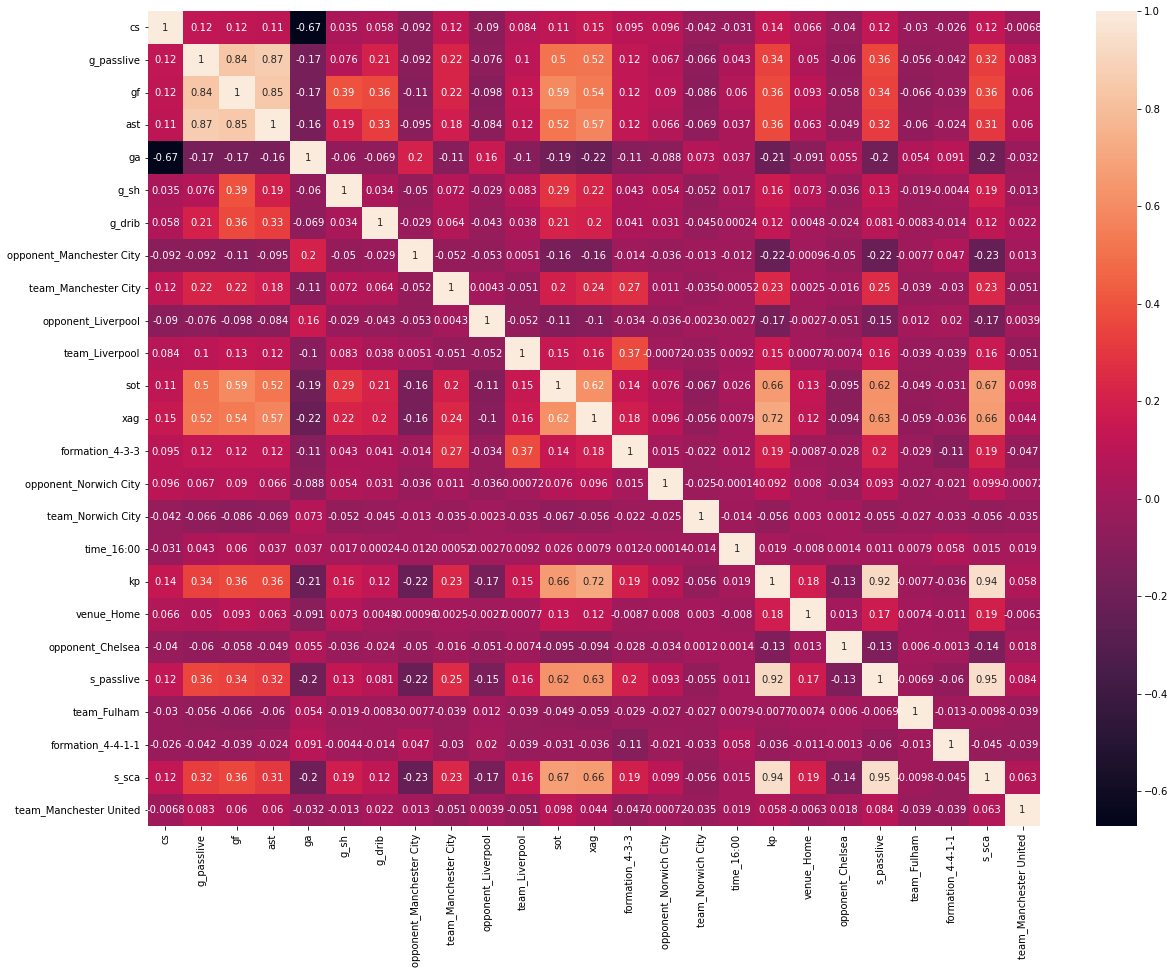

In [118]:
corr_matrix = X_corr_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

# Plots to look at best multi-collinearity

In [119]:
col_viz = ['ast','g_passlive','gf','kp','s_passlive','s_sca','ga']
# Although 'ga' has low multicollinearity, I will drop it because it directly relates to match result.

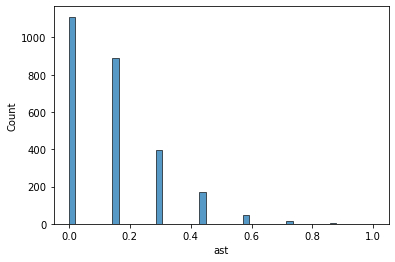

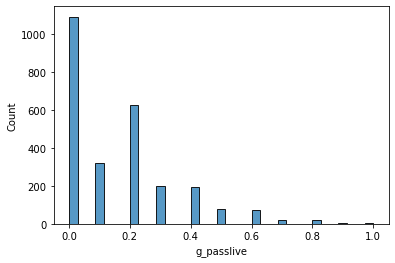

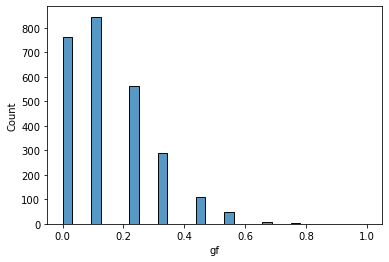

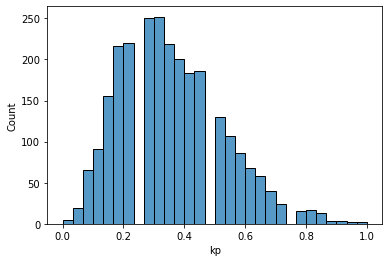

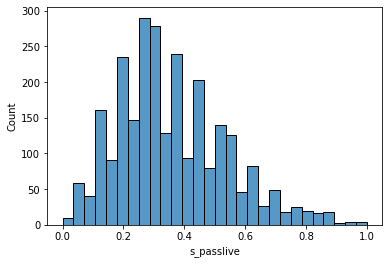

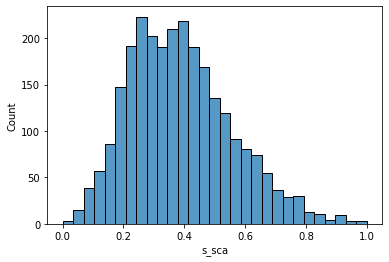

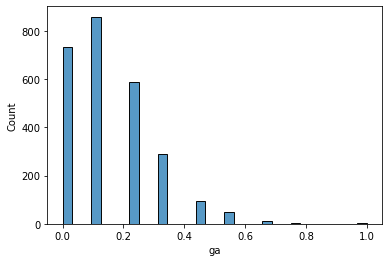

In [120]:
for column in X_corr_data[col_viz]:
    sns.histplot( x=X_corr_data[column])
    plt.show()

In [121]:
cols_to_drop = ['ast','g_passlive','gf','kp','s_passlive','s_sca','ga']

In [122]:
X_train = X_corr_data.drop(['ast','g_passlive','gf','kp','s_passlive','s_sca','ga'], axis = 1)
X_train.shape
X_test = X_test_all.drop(['ast','g_passlive','gf','kp','s_passlive','s_sca','ga'], axis = 1)
X_test.head()

,cs,g_sh,g_drib,opponent_Manchester City,team_Manchester City,opponent_Liverpool,team_Liverpool,sot,xag,formation_4-3-3,opponent_Norwich City,team_Norwich City,time_16:00,venue_Home,opponent_Chelsea,team_Fulham,formation_4-4-1-1,team_Manchester United
0,0.0,0.666667,0.000000,0.0,0.0,0.0,0.0,0.200000,0.136364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.204545,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.466667,0.431818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.133333,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
X_train.columns

Index(['cs', 'g_sh', 'g_drib', 'opponent_Manchester City',
       'team_Manchester City', 'opponent_Liverpool', 'team_Liverpool', 'sot',
       'xag', 'formation_4-3-3', 'opponent_Norwich City', 'team_Norwich City',
       'time_16:00', 'venue_Home', 'opponent_Chelsea', 'team_Fulham',
       'formation_4-4-1-1', 'team_Manchester United'],
      dtype='object')

In [124]:
X_test.columns

Index(['cs', 'g_sh', 'g_drib', 'opponent_Manchester City',
       'team_Manchester City', 'opponent_Liverpool', 'team_Liverpool', 'sot',
       'xag', 'formation_4-3-3', 'opponent_Norwich City', 'team_Norwich City',
       'time_16:00', 'venue_Home', 'opponent_Chelsea', 'team_Fulham',
       'formation_4-4-1-1', 'team_Manchester United'],
      dtype='object')

# Hyperparameter search

In [125]:
# For RandomForestClassifier

# max_samples: fraction of X-train to use in each tree

max_depth_choices= [3,4,5,6,7,8,9,10,None]
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
max_features_choices = [2,6,10,14,17]

random_grid = {'max_depth': max_depth_choices, # max_depth: max number of questions to ask
               'min_samples_split': min_samples_split_choices, # min_samples_split: amount of rows still considered at every question
               'min_samples_leaf': min_samples_leaf_choices, # min_samples_leaf: ultimate answer based on at least this many rows
               'max_features': max_features_choices}

In [126]:
%%time

model1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model1, param_grid = random_grid, cv = 5, n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: user 53.3 s, sys: 6.19 s, total: 59.5 s
Wall time: 47min 8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [2, 6, 10, 14, 17],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [127]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [128]:
grid_search.best_score_

0.6931169327782628

In [129]:
# For DecisionTreeClassifier

max_depth_choices= [3,4,5,6,7,8,9,10,None]
splitter_choices=['best','random']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
min_weight_fraction_leaf_choices = [0.1,0.3,0.5,0.7,1]
max_features_choices = [2,6,10,14,17]

random_grid = {'max_depth': max_depth_choices,
               'splitter': splitter_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'min_weight_fraction_leaf': min_weight_fraction_leaf_choices,
               'max_features': max_features_choices}

In [130]:
%%time

model2 = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model2, param_grid = random_grid, cv = 5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72900 fits failed out of a total of 182250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72900 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise Val

CPU times: user 1min 31s, sys: 5.14 s, total: 1min 37s
Wall time: 8min 38s


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.49261333 0.50136435 0.44394052 0.39194811 0.39194811 0.39194811
        nan        nan        nan        nan 0.54085613 0.42614339
 0.39194811 0.39194811 0.39194811 0.39194811        nan        nan
        nan        nan 0.5412313  0.42496519 0.45159126 0.39194811
 0.39194811 0.39194811        nan        nan        nan        nan
 0.53403944 0.48956645 0.46180186 0.40145381 0.39194811 0.39194811
        nan        nan        nan        nan 0.50318035 0.40712838
 0.41927259 0.39574318 0.39194811 0.39194811        nan        nan
        nan        nan 0.47090209 0.51354896 0.46182567 0.39574318
 0.39194811 0.39194811        nan        nan        nan        nan
 0.49525112 0.44583805 0.42388727 0.39194811 0.39194811 0.39194811
        nan        nan        nan        nan 0.39194811 0.48162567
 0.41737506 0.41092344 0.39194811

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [2, 6, 10, 14, 17],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 1],
                         'splitter': ['best', 'random']})

In [131]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [132]:
grid_search.best_score_

0.65780766372537

# Model pipeline

In [133]:
model1 = RandomForestClassifier(max_depth=8, min_samples_split=3, min_samples_leaf =2, max_features=6) 
model2 = DecisionTreeClassifier(max_depth=7, splitter='best', min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf=0.1, max_features=10) 
model3 = LogisticRegression()

model_pipeline = [model1, model2, model3]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Random Forest Classifier': 0.6885657909897454, 'Decision Tree Classifier': 0.630905058186427, 'Logistic Regression': 0.6889517801590044}


In [134]:
list(zip(model_pipeline, model_names))

[(RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=2,
                         min_samples_split=3),
  'Random Forest Classifier'),
 (DecisionTreeClassifier(max_depth=7, max_features=10, min_samples_leaf=3,
                         min_samples_split=4, min_weight_fraction_leaf=0.1),
  'Decision Tree Classifier'),
 (LogisticRegression(), 'Logistic Regression')]

In [135]:
test_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    test_scores[model_name] = model.score(X_test,y_test)
print(test_scores)

{'Random Forest Classifier': 0.6707132018209409, 'Decision Tree Classifier': 0.6327769347496206, 'Logistic Regression': 0.65402124430956}


In [136]:
y_train.value_counts() # balanced data

Lose    1032
Win     1022
Draw     579
Name: result, dtype: int64

In [137]:
print(y_test.value_counts())

Win     257
Lose    247
Draw    155
Name: result, dtype: int64


In [138]:
# RandomForestClassifier
predictions = model1.predict(X_test)

print('accuracy:', accuracy_score(y_test, predictions))
print("precision: ", precision_score(y_test,predictions,average='weighted'))
print("recall: ", recall_score(y_test,predictions,average='weighted'))
print("f1: ", f1_score(y_test,predictions,average='weighted'))

accuracy: 0.6707132018209409
precision:  0.6491673613960838
recall:  0.6707132018209409
f1:  0.6093884654185543


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


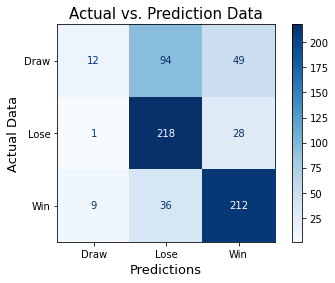

In [139]:
# RandomForestClassifier
fig_1 = plot_confusion_matrix(model1, X_test, y_test, cmap = plt.cm.Blues)
plt.title('Actual vs. Prediction Data', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actual Data', fontsize=13)
plt.show()

In [140]:
# There are 659 predictions of the match results in test data (2017-2022 season).
# It was predicted that the relevant teams would win in 299 matches. The actual data shows that the relevant teams would win in 212 matches.
# It was predicted that the relevant teams would lose in 348 matches. The actual data shows that the relevant teams would lose in 218 matches.
# It was predicted that the relevant teams would draw in 22 matches. The actual data shows that the relevant teams would draw in 12 matches.

# accuracy: 0.67; precision:  0.65; recall:  0.67; f1:  0.61

# The random forest classifier's accuracy is good.

In [141]:
pickle.dump(model1, open('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/pickle/model1.p', 'wb')) 

In [142]:
pickle.dump(model2, open('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/pickle/model2.p', 'wb')) 

In [143]:
pickle.dump(model3, open('/Users/ozguryildirim/Desktop/5-Ironhack-Bootcamp/20221031-20221104_9th_Week_FinalProject/pickle/model3.p', 'wb')) 